# Chapter5-2


## 感情分析モデルのエラー分析

chapter5-1にて作成したモデルの分析を行う。<br>
モデルの改善の手がかりを得るために、全体の予測傾向、予測データの性質を調べる



In [1]:
!pip install transformers[ja,torch] datasets matplotlib scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.9/600.9 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 95.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB

## Google Driveからモデルを読み込む

In [ ]:
!cp -r drive/MyDrive/Learning_LLM/chapter5/model/ ./

In [3]:
import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from transformers import pipeline

model_path = "/content/drive/MyDrive/Learning_LLM/chapter5/model"

# モデルの読み込み
pipe = pipeline(model=model_path, device=DEVICE)

RuntimeError: Instantiating a pipeline without a task set raised an error: Repo id must be in the form 'repo_name' or 'namespace/repo_name': '/content/drive/MyDrive/Learning_LLM/chapter5/model'. Use `repo_type` argument if needed.

## 読み込めない時は以下のコードを実装する

In [4]:
from transformers import pipeline

model = "llm-book/bert-base-japanese-v3-marc_ja"

pipe = pipeline(model=model, device=DEVICE)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/231k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

## 予測の結果を取得する

In [5]:
# 検証セットのデータを読み込む
from datasets import load_dataset

valid_dataset = load_dataset(
    "llm-book/wrime-sentiment", split="validation"
)

Generating train split:   0%|          | 0/20149 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1608 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1781 [00:00<?, ? examples/s]

In [6]:
# モデルの予測結果を取得
from tqdm import tqdm

class_label = valid_dataset.features["label"]

results: list[dict[str, float | str]] = []

for i, example in tqdm(enumerate(valid_dataset)):
  print(example["sentence"])

  # モデルの予測結果を取得する
  model_prediction = pipe(example["sentence"])[0]

  # 正解のラベルIDをラベル名に変換する
  true_label = class_label.int2str(example["label"])

  # 分析に必要な情報をresultsに格納
  results.append(
      {
          "example_id" : i,
          "pred_prob" : model_prediction["score"],  # モデルの精度
          "pred_label" : model_prediction["label"], # 推論したラベル
          "true_label" : true_label
      }
  )


0it [00:00, ?it/s]

話を続けるための子どもって感じかな。
でも、それって簡単にやってはいけない気もする。


3it [00:01,  2.59it/s]

今、製作中の劇場版が子どもとかだったらどうしよう。
終わってから勝手に子どもとかは今の時代に厳しいよねー
銀魂だったらショック。
銀魂はあの終わり方は全ての界隈で大変、評価されていて、そういう意味での空知先生、ありがとう連呼だった。
妄想の余地を残してくれてありがとう。


8it [00:01,  8.26it/s]

ジャンプの休載、終わってるからもはや関係なくて・・・
フォローとかはあまりしたくないし、
私も影響はあるけど、1年ぐらいダメだと思い込んでる。というか・・・
悪い方にしか浮かばない。
あれもこれもＩＴ化すればいいってわけでもない。
いろいろ感想を持つけど、あとでこういうところに書く予定だと感想を持つ時点でそうなるからよくない。
5年前に行ったミニシアターを調べた。営業再開だった。大丈夫みたい。
普通な一般的な人たちの話。まだ経験が浅い。
腐女子4人でやってみたら面白そう。
昨日ステイゴールドを聞いた。久しぶりのように思った。


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
22it [00:01, 25.99it/s]

ドラマや映画でなく一度、舞台の演技を観てみたかったから・・・
見てよかったと思う。
舞台ってＤＶＤにはならないよね。
去年の劇のインタビューも読んだ気がする。ダヴィンチに載ってた。
岡田将生 結婚で検索したら
岡田将生 さんは結婚されてませんって表示された。面白い。
結婚ネタは避けたいけど攻めてみた。
どうでもいい。宇宙の外でやってほしい。
よくわからない連携。
この3年が無駄になった。
空気を読んでなくて。
自分がその名を口にしていいレベルじゃないのに
やってしまったのが間違えか。
すごい学歴とか職歴とかが必要だったかな。
すべてが勘違いで終わりそう。
最近、知ったあの人も知ってるのかな？ならうれしいとかずっと考えていて、手掛かりすら見つけられない。
っていうか、英語の聞きすぎ
勘違い祭り。
歌詞の勘違い多い。空耳。
単純な動詞なのにそんな重要なところにいるのか！みたいな驚き。
類推できな言葉に時々、ぶつかる。
さっき、雨の中、急に混線してきた宇多田ヒカルに負けてしまった。


36it [00:02, 44.06it/s]

絶対にこの日に一瞬、迷ったけど、決めた。
イベントに参加する。家にいながらにおいても、
いついつどこでっていうのもすごい苦手。
2014年も記念の年で、いつも記念日を数えているみたいですごい
全部見た。特にオチはなかった。
面白そうな展開もあったんだけど・・・
人が人としゃべっているのが楽しかった。
結局2巻ぐらいまでしか読めてなくてレンタルもできない。
全く知らなかった。でも明日の話はもう早バレでわかっているらしい。そうなのか。新刊の発売と被せたのかな。
そしてFFエンド。
けどこのことで空知先生ありがとうという関係ない感謝が思い出されていてすごい。
介護かなって思って、違ったケースを知っているから・・・
なんとも言えない。
新連載の作画の先生！すぐピンと来た。オランウータンとか秘話、面白かった。
追いつかないな。
三国志もちょっとだけ読んだけど、読むのを休むとわからなくなってしまったし、別の本でネタバレみたりして、、、混乱。
明日は楽しみかも。
今まで語る言葉の１つも持ってなかった。どう接すればいいかもわからなかった。
知ることも大事でやっぱり駄目だった。
今日は誤字だらけ。
中途半端な年代ばかり聞いているのは過去を懐かしく思うことできず、現在にも留まれず、未来も見えないからなのかも。単なる言い訳。今すぐ聞こうって思ってn度目なんだろう。
あのタグがトレンド入りしてた。
すごい！
なかなかトレンド入りって難しいのに。
7000人だったし。
これならさいたまスーパーアリーナだろうって思った。
調べると9000人必要らしい。


51it [00:02, 58.27it/s]

あれでおしまいかと思われたけど、水曜日に配信もあるらしい。
SUNがいいなと思った。
パーソナルなものであるのでってこと？こういう表現が適当か？
おすすめしたくないじゃなく、できないかな。
ラジオとかでみんなで共有する曲ってだいたい決まったやつ。
それにあてはまらない。
なぜリクエストしなかった？音源はなさそうだし。そもそも音源の問題。
テレビで3曲とも聞いた。音もこっちがいいかも。
スマホと全然、すべてが違った。
あの3曲を聞くと、何も聞けないなあ。

さっき、リアーナが流れてた。シーア。
洋楽と一緒に聞くのがちょうどいい何でも。
とかいつも思ってたりして・・・
すぐ、無意識に足をすくわれて、とらわれてしまう。
GWいろいろリアであって、全部やり直しになったね。コロナ関係なしに。
だから休んでる。
すべてが勝手な思い込み。ツイッター見たらそうじゃないってわかる。目が覚める。
判断基準は古いか新しいかだけだった。
アプリが終了らしい。7月末。
一度、インストールしてアンインストールした。
月曜日が楽しみですね。トレンド入りするかな。
ほんと、考察がすごい。
自分だけではわからなかったこととか多すぎる。
他のことにも援用できる。
物の見方が広がる。
書類送付した求人、電話来て 「〇日に顔合わせを」と言われたのだけど、面接とは違うの? いきなり認印が必要って、何を書くの?


67it [00:02, 64.18it/s]

5月からまさかの夫の出勤日が9日だけ。 出勤と公休と間違っているのでは?と思うようなシフト表… 見たくない。
引越して家が狭くなったし、外出自粛期間だし
こんな所に3人で籠ってたら、超絶イライラする。
洗濯物も干せないこんなベランダじゃ(pien)
申し訳ないけど、22日も休みなら、半分くらいは日払いのバイト行ってくれないかな。給料だって減らされるのだし。
寝起きの筋トレ、やっぱりあまりよくないっぽい。 脂肪燃焼しやすいらしいけど 起きて1時間くらいしてからとか、水分取ってからとか 私目が覚めて布団出る前に腹筋してたよ
録画していた関ジャム　アイドル特集で、#BISH を長々ととくしゅうしてくれてるのが嬉しいし、猪木歌唱とかクマムシ禁止とか面白い。でもギャンパレとかWAggももっと取り上げてほしかったな。
本当に、どっか行かないかな
そういうならお前がどっか行けって思われるのだろうけど、私は微々たる料金にしかならなくても、ちょこちょこ働いているのだけど。
31のスーパーチョコミント食べたい でもどこもテナント入居してるビル自体が休業中でやってないのだけど。
ミッションV6　自分の地域では再放送されない予感なら強くする
しかもTBSチャンネル2で、ウルトラマンティガ一挙再放送… 最終回3部作の前の「ウルトラの星」 長野くんが1人2役、しかも初代ウルトラマンとティガの共演で大好き。 #ウルトラマンティガ　#長野博
もちろん、こちらも見られない。TBSチャンネル契約してない。
以前はスカパー契約していたけど、引越して解約してしまったし。
朝一で洗濯機が排水しなくてストップ。
今壊れても、引越とか新しい駐車場とかへの費用で、口座残高無いから。
やめて、買えない。
始めからやり直したら濯ぎも脱水もできたけど。
今度から逐一止まったら、また1からやり直し?
水2倍かかるんだけど。
本当に邪魔だからどっか行ってほしい。
Amazon、登録しているアドレスが前の前の物だから変更したい
↓
設定から変更の必要あり、アカウント認証しないといけない
↓
認証コードがメールで届くらしい
↓
前のアドレスだから、送信されても見られない
↓
認証できない
↓
アドレス変更できない
↓
始めに戻る
#Amazon　#ログインできない


83it [00:02, 69.70it/s]

だんなデスノートはあるのに、子供デスノート無いのは何故?
これから殆ど家にいる日ばかりなのに、起きてすぐテレビつけんなよ。
1日何時間付けてる気だよ。
用も無いのにテレビつけてるなんて馬鹿の極みだろ。
1円でも電気代節約しろよ。
この前見た、商品一括検索サイトが見当たらなくなった
もしかしてテストサイトで確認終わって、サイトそのものが削除されたのかな
昨日久々にNHKのみんなの手話見たけど、健君が手話を交えて絵本読むコーナーで、五味太郎さんの食べたのだあれを紹介。
全頁が「〜〇〇食べたのだあれ」で 最後の「だあれ」部分の言い方を色々と変えていて、どの言い方も可愛かった。
#アテニア のクレンジング、今更だけど初めて使ってみた。 @コスメで人気なのがよく分かった。
#アテニア　#スキンクリアクレンズオイル 角栓マンの私の鼻がすっきり(笑)、しかも翌朝も毛穴が引き締まったまま。 くすみへの効果はまだ出ないけど(2日目だから当たり前)、他のクレンジング暫く使えなさそう。 #コスメ　#コスメコンシェルジュ　#アットコスメ
しかも同じフロアに #お茶の井ヶ田 があって、小学生の時に制服のまま親と一緒に抹茶ソフトよく食べてた。
あの時から抹茶好きが始まった…?
#抹茶　#抹茶スイーツ
こうなると色々な事を思い出すのだけど、
仙台ホテルの地下に飲食店が何件か入っていて、奥の方にある甘味処にも
制服のまま親と一緒によく行っていて、おしるこを食べてた。
#小学生女子 #和スイーツ
同じく仙台ホテルにカレー屋さんもあって、そこも何回も行った。
ザ・カレーの入れ物って感じの銀の器に入れられてて
ご飯の上に数粒レーズンが乗せられていた。
多分、そこで生まれて初めてラッシーを飲んだと思う。
#カレー
今日ってこどもの日か。全く祝う(?)気にならないけど。
こどもの日なぞ全く無関係で、夕飯は牛タン山盛り(笑)
わさび醤油、結構合う。
処分したサイドボードの代わりの収納家具を漸く購入。 自分の考えが甘く、ちょっと容量足りなかったかも。 間違っても夫には言えないけど。
一昨日迄着ていたパジャマが厚手で、流石に暑いと思って薄手に変えたら、今日は寒い。


100it [00:03, 72.38it/s]

ただ自分の抹茶好きは、私を妊娠中も母親が茶道に通い続けたからだと思ってる。
へその緒を通じて抹茶を摂取(笑)
小1の時から中高の学園祭の茶道部で抹茶頂いていたけど、 子供は幼稚園の時から茶道部で平気でお茶飲んでたし、寧ろ学園祭で一番楽しみにしてる部だった。 #小学生男子　#抹茶
始まった。いい年していつまではなかっぱみるんだよ、ばかが。
年齢相応の物見ろよ。幼稚園向けの見てどうすんだよ、だからバカなんだよ。
もふもふモフモフ　可愛い。 #NHK
しかも船の数も限られているから、猫に触れ合う以外ははっきり言って暇だった。
探せばあるのだろうけど、 #アマビエ デザインのマスクでも作ったら、防御率更にアップしそう
エコバッグから溶けたアイス発見… 買ったこと忘れてた
明日面接なのに、今迄面接とかかしこまった場に行くときに使っていた濃紺のバッグが見当たらない。
今度仕事する時は、何かしら公的資格も取れる所で働きたい
子供帰ってこないのだけど、どこまで行った ?
と言うか遅すぎるのだけど、最近行動範囲が広がっているから、どこに行ったか見当つかず探しに行けない
流石に遅い?　普段なら17時位迄には帰ってきてたのだけど
朝から本当に腹立たしい。
集積所にもっていかないなら、見える所に出すなよ
とりあえず一回中身ぶちまけといた(笑) 缶だから


117it [00:03, 75.89it/s]

私ペットボトルのごみの方が多いし、自分の分は都度持っていってるし。
コーラも酒も飲んでるの殆どあなたでしょ
郵便番号を入れると自動的に住所も入力されるシステム、今更だけど凄い。
探しに行くために、親呼び出してうちに待機してもらい、 父親は自転車で一足先に探しに出てもらい、 自分が探しに行こうと出ようとした帰って来た
時計もたせないのも悪いんだけど、今迄も時計なくても17時までには戻ってきてたじゃん
しかも本人は反省の色なし
イライラしやすいと思ったら今日雨だった
雨の時は一応、雨だから機嫌悪くなりやすいから刺激するなと周りに通告しているけど。
こどもちゃれんじのマナー忍者とか懐かしいな。 散々DVD見たのに何も学んでない。
いくら注意しても店の中で走り回るし、脚力ついて来たから走って追いかけるにも、子供がまた走るし。
他の人から見たら多動型だからじっとしていられないなんて分からないし。本当に疲れる。
相性の悪い星座組合せ、山羊座女性＆いて座男性　堂々のワースト3　まさにうちだけど(笑)　基本的に隣り合った星座同士って良くないって言うのは知ってる
勿論あまり信じてないし、おかげさまでうちは全然問題なし
因みに自分の周り、やたらいて座が多い
母親・夫・中学からのお友達・社長・同じパートの人
誰とも別に相性悪くない
明日の面接の会社で即決まりたい
一般事務より士業補助の方が勉強になる
明後日の方、勤務時間と社内外研修制度は魅力的だけど、通うにも何となく中途半端な距離
自分失業(?)、夫勤務(給料)激減で焦って仕事探して、破れかぶれで応募しまくるからこうなるのだけど


133it [00:03, 77.12it/s]

今日は散々行ったから、幼稚園児向け番組見ないで済んだ。 明日からもそうしろ。
2年以内に200万貯めて今回の引っ越し費用回収・次の引っ越し費用に充てたい
色々登録しすぎで訳わからなくなった。 無料期間過ぎる前に解除忘れないようにしないと。
書けない
今日こそ衣替えしようと思っていたけど、寒くてまたその気が失せる。
明日面接なのに全然準備していない
#にっぽんの廃線100 しっかり見逃した。何故録画すら忘れるのか←馬鹿だから。
サイト登録の為、アドレス入力　メール全然届かない。短時間にいくつかやったから滞ってるの?
確認メール来ないと、本登録できなくて凄い困るのだけど。
#アマビエ は描けそうにないけど、#ヨゲンノトリ なら何とか描けそう(笑)
大阪の中小企業で採用担当やってます。
現在大学3年生までの人でいろいろ話聞かせてくれる人いませんか。
今の大学生がどういうこと考えてるのか知りたいと思ってます。
カフェ代くらいは出します。
去年から新卒採用始めて思うこと

若者はもっと元気で覇気があると思ったけど、意外と真面目で現実的な人が多かった。

大学生の子にマナーがいいとか、敬語ができるとか、知識があるとか、経験があるとか、あんまり期待してないんだけどなぁ。
去年から新卒採用始めて思うこと

多くの人は大手志向で安定志向かなと思いきや、意外と小さい会社でやってみたいという学生がいた。
大手で組織の一部となるよりは、小さい会社で自由に思いっきり働ける方がいいと。
うちのような小さい会社にとっては追い風です。
去年から新卒採用始めて思うこと

グループディスカッションでほとんどしゃべらない人がいるのが残念。
選考は一発勝負なので、苦手だとしても、分からないとしても最大限努力する姿を見せて欲しい。
一生懸命頑張っている姿は魅力的に映る。
うまくしゃべったり、うまくまとめたりできる人もいるけど、正直それがそのまま仕事で通用するとは思ってない。

現時点での実力よりも5年後10年後にどこまで伸びるかを見ている。
残業時間増えると生産性下がるからあんまり意味ないんだけどなぁ。
早く帰って、しっかり寝て、楽しく仕事するという会社が今の日本には少ない。
古い考えの経営者、上司が原因の多くだと思う。


150it [00:03, 80.34it/s]

今日も公園で新しい友達作っとった。子供はすごいなぁ
今日の夜はたこ焼きパーティ。
普段全然料理しないけど、たこ焼きだけはひっくり返す
学校が休校で授業ないけど、無料の学習動画がいっぱいアップされてるからむしろ効率よく勉強できる！
緊急事態宣言延長か。。
倒産する会社が増えそう
コロナで仕事があまり進まないけど、今のうちに普段できないことを片付けられる！
失業者が増えると、自殺や犯罪が、増えるから嫌だなぁ。
ものすごい不況になりそう
コロナで家事することが多くなり、掃除が楽しくなってきた
仕事で宅建の資格が必要になってきた。
今なら勉強するのに最適な時だ！
子供と公園で長時間遊んでいると、予期せぬことがいろいろ起こる。
人が用意したプログラムではなく、自然が用意したプログラムは面白いし、勉強になる
3歳の子がテープで遊んでる内に、自分の口と鼻にテープ貼って苦しいってなってた
大型連休だけど、今年は毎日子供と公園だ。
それもいい。お金もかからないし。
連休中も一日一時間くらい仕事してる。一時間なら疲れないし。集中できる。
こんな、働き方できるのもリモートでできるようになった恩恵
鯉のぼり、かぶと作った。
#子どもの日
実家の親とラインでテレビ通話した。
夜だったけど子どもたちが大はしゃぎで喜んでた。
帰省しなくても十分楽しめる
今日から仕事！
連休は愛する家族とたくさん一緒に過ごせて楽しかった。
仕事で新規案件の話が複数入ってきた経済が動き出してきた。
特に大阪は吉村知事が積極的に動いているから、経済の段階的再開が早そう。
和歌山に一軒家土地付きを買った。30万円。
これからは地方で自然の中でゆっくり過ごしたいと思う人がたくさん出てくるはず。
小学校が週１で再開するらしい。
公立の学校はオンラインとかはやっぱり難しいのかな。集まってやる授業も必要やけど、オンラインも併用してうまくやってほしい。


168it [00:03, 80.24it/s]

将来授業の一部はオンラインとか録画でやるとなったら、もう少し教師に余力が出るんじゃないかな。今の教師は忙しすぎるからもうちょっと何とかしてあげた方がいいと思う
通勤電車の人数も増えてきた。大手などリモート推進していけば、通勤ラッシュも緩和されていくのかな。そうなってほしい。
政治に対する批判もネット上でたくさん出てるけど、次の選挙では投票率だいぶ上がるんかな？維新はだいぶ伸びそう
飲食店だいぶ再開してるとこ多いけど、座れる席数をだいぶ減らしてる。
3密はみんな気にするからなぁ。ただでさえあまり利益の出ない飲食業界で売上下がるからだいぶきついやろうなぁ。
ソフトバンク、楽天、元zozoの前澤さんなどお金持ちが社会問題を解決するために動いてるのがとても感動する。
バレーはできないが、ランニングしたりして以前より運動量増えてるかも
昼は暑いけど、朝晩は涼しいからランニングは最適な季節！
母の日ということで親とラインでテレビ通話した。子どもたちがずっとしゃべっとったけど、親もとてもうれしそうな顔してた。
ただでテレビ通話できるってよく考えるとすごいな。しかもいろんな機能付いてるし、今のテクノロジーを使うといろんなことが豊かにできる。
7歳の娘が虫にハマってるからねっとでいろいろ調べさせて研究させてみたら、テントウムシについての研究資料をまとめて発表をしてくれた。
テントウムシがどれくらい生きるのか、どこにいるのか、どんな種類がいるのかなどけっこうよく調べていて、話し方も結構うまかった。なにより楽しそうにやっていたのが一番良かった。
娘曰く、次はアリの研究、ダンゴムシの研究、地球の研究、川の研究、人間の研究をするらしい。今時間のある時に思いっきりやってほしい！
スピッツ聞きながら仕事してる。めっちゃはかどる
融資とか助成金とかいっぱいあって資料もややこしい。。
ベーシックインカムの話よく聞くけど、実現したらめっちゃいいと思う。楽に暮らせるというのもあるけど、起業とかやりたいことにもっと挑戦できると思う。
ベーシックインカムが実現すると会社で通用する人材にするための教育じゃなくていいので、学校教育も大きく変わるんじゃないかな。もっと人間らしい、面白い教育が出来そう。そういう教育やってみたい。
韓国のクラブで集団感染って。。
なんでそんなリスクの高いことを許容したんや。。


186it [00:04, 79.80it/s]

海の絵本読んで、子どもが貝とか魚に興味持った。
今から海行くの楽しみにしてる。。
コロナで株価思いっきり下がるかなと思ったけど、あんまり下がらんな。。下がってから買おうと思ってたのに。
毎週月曜夜は家族会議の日。
子どもたちを寝かせてからいろいろ話しながら、おいしいものを食べる。
昨日母の日だったけど、妻には何もしてないので今日ケーキでも買って帰ろうかな。
夜中に食べるケーキやラーメンてどうしてあんなにおいしいんだろう？
体に良くないはずなのに、体が求めてる
大型の内装リニューアル工事が入ってきた。
積極的に動いてるなぁ。
コロナに十分気を付けながら、うちもどんどん仕事していく。
価値を創り出していく。
ドラクエのBGM聞きながら仕事してると、めっちゃやる気になる。
曲によっては泣きそうになる。
前より動画で情報を仕入れることが多くなった。
無料でもかなり良質なものがたくさんある。
クラブやイベントなど人を集めることで成り立つビジネスは当面きつくなるだろうな。コロナが収まってきても完全になくなるとは考えにくいから。
子どもがYoutubeで動物の動画をよく見るんだけど、動物の赤ちゃんが可愛すぎる。
パンダ、豚、カバ、サル、どの動物も赤ちゃんは可愛すぎる！
動画で見るだけで癒される
インバウンドも当面きついから、インバウンドに頼っていた業種も今のままじゃダメだろうな。
今さらだけどメモ魔読んだ。
メモというよりは深く考えることの大事さを学んだ。
調べてみると、ほとんどのものがネットで買えることに気付いた。便利な世の中。今後も使い続けます。
宅配って結局最後は人の手で配るから間違えることもありそう。高価なものだったりしたら、結構面倒なことになりそう。


195it [00:04, 81.35it/s]

今日は暑かった、駅から歩くだけで汗かいた。ちょっと前まで寒かったのに。
コロナが続くと服買うの困るなぁ。
ネットでも買えるけど、実物を色々見ながら気に入ったものを買ってたので、どうしようかな。
昨日子どもと公園行った。雨９０％だったので、雨降ったら帰るよって言ってたのに、ずっと降らなくてなかなか帰れなかった。
結局夕方まで雨降らず、子どもたちは十分遊べて満足したようで、それはそれで良かった。
子どもと公園で遊んでいるとき、トイレに行こうと思ったが、コンビニのトイレがコロナのため利用できませんってなってた。
こんなところにまでコロナの影響が。。
コロナのためトイレ利用禁止になってたコンビニは、元々あまりトイレ開放するのが嫌だったのかな
トイレ利用だけで何も買わないこともあるからなぁ
いつも行ってる美容院が再開してた。
やっと髪切りに行ける。コロナに対してもいろいろ対策しているみたいだ。
コロナの流れでコンビニがトイレ閉めたら困ること多いな。
公園にもトイレあるけど、汚いことが多い。
行政が掃除してくれてはいるんだろうけど、外で利用者も多いのですぐ汚れるので、子どもは嫌がる。
ピアノの個別レッスンがなくなって、娘がなかなか家で練習しない。
どうしたらやる気になるかなー
自分もピアノ弾くので、娘もうまくなって一緒に弾きたいなとおもうんだけど、現実はなかなか難しい。
ピアノの動画とか興味を持ってすごい見るんだけどなー
まだ小さいからある程度強制力がいるんだろうか？
ティッシュやトイレットペーパーはだいぶ供給されてきた。
マスクももう少しかな。
今の時期でも飛び込み営業に来る人がいるのにはびっくりした。
しかも全然必要ない商品。
対面営業、飛び込み営業をメインの仕事にしてた人、会社は大変だな。
受ける側が拒否してしまう。
辻ちゃんってすごいよね。

毎日子供の世話して、料理作って。

私が辻ちゃんだったら、金に物言わせて、家政婦雇って全部やってもらっちゃう。

炎上してる理由も嫉妬がほとんどのような気がするし。

旦那もイケメンだし。
東京オリンピックのチケット当たったけど、いざ行くとなるとめんどくさい。

サッカー札幌ドームだし。
東京オリンピックなのに。
IKKOさんおすすめの化粧水は、【極潤ヒアルロン液】！

偶然にも私も使ってる。
これ使いだしてから、他のは使えないよ

213it [00:04, 81.93it/s]

誕生日ケーキって、手作りより買ったほうが絶対おいしいよね…

と、自分に言い聞かせてケーキ予約する。
キャバ嬢は健康管理も大切。

会社員なら、傷病休暇なんてものがあるが、

キャバ嬢は体を壊してしまったら、収入は一瞬で0になる。

この時期、特にインフルや風邪を移されやすいので注意！！
子供を育てながら、仕事して思うのは、常に時間に追われること。

私はいかに効率良く物事を進めるか常に考えています。

時間が儲かるなら喜んでお金を払う。

できた時間で、払った以上に儲かる方法を生み出す。

これがベスト。
私は関西出身なのですが、おそばは東京のほうが好き！

関西人は東京のそばは味が濃すぎるというけど、私のような関西人もいるはず。

東京に来た際は

／
富士そば
＼

に是非行ってください。
子育ては期間限定。

やってもやらなくても終わりは来る！

後悔しないようにやり抜く！
コロナが怖いのでどこにも行けない。

三連休なのに…

明日どうしようかなぁ。
ワイヤレス掃除機買ってめちゃ掃除が楽になった。

掃除してるときに、コードに子供がじゃれるんだよね。

ルンバも欲しいなぁ。
＼早起きは三文の徳／

夜より朝活動したほうが、断然頭の回転が速い。
一日1時間早起きを毎日続けていれば、1年後にはすごい時間数に。

ライバルとの差をつけるためには、早起きは必須だね。
新幹線に無料wifiが導入されるらしい。

待ちにまってました！
新幹線でパソコン使うと、すぐに容量制限がかかっちゃうんだよね。

トンネルの中だと、圏外になるし。。
そこは変わらないか！？
king gnu（キングヌー）に遅ればせながら、ハマっている。

「白日」が頭の中にエンドレスで流れている。

／
まっさらに生まれ変わって、人生一から始めようが〜♪
＼

それ以外の曲も圧倒的にかっこ良い！！
人間は物事を否定的に考えるとき、周りの環境のせいにしたがるけど、結局は自分次第。

やるかやらないか。

「自分にはその能力がない」
「時間がない」

と言い訳に頼ることなく、
できる方法を自問自答することで物事は前に進む。
私が東京に来た理由。

キャバの給料が地方と比べて雲泥の差。

同じ労働力でもいっぱい稼げる。

そのかわり物価も高いけど、チャンスがゴロゴロ転がってる東京に一度はチャレンジしてみる

231it [00:04, 80.75it/s]

自分が嫌いな仕事をしていると絶対に幸せにならない。

私は今の仕事が嫌いだから20代のうちに必ず辞める。

そのために今は鬼のように努力することに決めてる。

好きなことだけして生きていくのが理想だけど、かなり難しい。

嫌いなことを避けて生活するだけで人生は幸せに近づくはず。
ここまで、コロナの影響が広がるとは…
思いもしなかったよ
そろそろ花粉がやばい。
鼻うがいしてみようかしら。
タバコ吸ってるやつ全員死んでほしい
＼水商売を始めようとしている女性へのアドバイス／

●スカウトは使わないほうが絶対良い●

彼（彼女）らは自分の利益のことしか考えていない。

Twitterやインスタでお店を探したほうが、自分にあった良い店が見つかります。

これだけSNSが活用されている時代。

SNSを最大限利用しよう！
2月の収益報告

キャバ　46万円
その他　 6万円

サラリーマンの平均くらいは稼げるようになった。
まだまだこれから頑張る
頭が働かないときは適度な運動が効果的。

私のベストはジョギングなんだけど、子供がいるから今は無理。

子供の手がかからなくなったら、フルマラソンに出たい。
電動自転車が便利すぎる。

子供2人乗せても坂道もラクラク。

手放せないなコリャ。

今の時代に生まれて良かったよ。
楽天携帯はアイフォンでは使えないらしいです。
なんじゃそりゃ。
キャバで胸触ってくるやつは死んでほしいけど、

髪の毛触ってくるやつも死んでほしい。

なんなら、客全員死んでほしい。

金だけ置いて死んでくれ。
何でおっさんて同じ話何回もするんだろ。

その話何回も聞いたわっ。

って心の中でつぶやく。。
葉加瀬太郎おすすめの六本木の某ラーメン。

私の口には合わなかったわ。

愛想も悪いし、もう行かないかな。
東京のコンビニ店員のほとんどが外国人。

悪いけど、外人に偏見があるので、辞めてほしい。

せめて日本語通じるやつを置いてくれ。
明日は家でゆっくりしよう。
今から仕事だけど、既に家に帰りたい。
あなたの仕事は変わりがいるのか？

ほとんどの人がしている仕事はいくらでも変わりがいる。

会社員なら、あなたがいなくなってもたいていの場合、会社は困らない。

ならば、大切な人、家族のために生きよう。

そのためにはお金が必要。
株価が悲惨な状態に。

楽天

249it [00:04, 81.17it/s]

3月はpaypayでガストがお得らしい。
これは行かねば。

なんだかんだ、子供が喜ぶし、周りも子供連ればっかりだから気が楽なんだよね。
人間は物事を否定的に考えるとき、周りの環境のせいにしたがるけど、結局は自分次第。

やるかやらないか。

「自分にはその能力がない」
「時間がない」

と言い訳に頼ることなく、
できる方法を自問自答することで物事は前に進む。
楽天証券口座がようやく開設。

なかなか開設できなかったから、イライラしたけど、今の相場を見れば、このタイミングで良かったよ。

楽天ありがとね。
コロナ撒き散らかしたおっさん死んだって。
死んだら終わりだね。
死なないようにしよう。
死んだら終わり。
生きてるだけで丸儲けって、ほんと正しいね。
オリンピックって何のためにやるんだろ。
少なくとも延期にすれば良いのに。

頭硬すぎるでしょ。
コロナの影響で経済は死んでるけど、私がやるべきことは変わらない。

日々努力あるのみ。
最近現金を使うことがほとんど無くなった。
楽天payやpaypayで支払い済ませてる。
ポイントが付くのはもちろんメリットだけど、それ以上に私が感じる一番のメリットは、
／
現金を触らなくて済むこと
＼
今まで他人からもらったお札や小銭を財布に入れるのに抵抗があったけど、ストレスフリーに！
詐欺じゃん。
水商売は税金を払ってない人が実際多いです。
（私はちゃんと払ってます）
おはようございます！
朝なのに既に仕事に行きたくありません！
緊急事態宣言って、まだ出てないの？
緊急なのに？
全員死んでください
命が一番大事だよ。
死んだら全部意味ない。
子供とずっと一緒にいたら、太る。
子供が残したもの食べるから。
緊急事態宣言で何か変わるのかと思ったら、
ほとんど何も変わらないんだね。
キャバ嬢での収入はほとんど0に近いです。
でもやっぱり子供や自分の命が大事なので、しばらく働くの辞めます。


267it [00:05, 79.28it/s]

収入が減るとやっぱり思うのは収入源をいくつか用意しておくことが必要ということ。

私の場合、キャバ嬢の収入がなくなってももう一つの仕事で何とか生活ができる。
（貯金はできないが）
投資信託がどう考えても今が買いだと思うんだけど。

2〜3年後は下がってるだろうけど、20年後にアメリカの株価が今と比べて上がっているか下がっているかどちらと問われれば、上がっているほうに賭ける。

生活資金を除いた余剰資金を投資に回したい。
図書館を良く利用するんだけど、めちゃ便利。
子供の絵本を毎週10冊くらい借りるし、私が読みたい本も借りる。

私の場合、買った本だといつでも読めると思ってしまって読まずに放置が多かった。
図書館の本だと期限があるので、放置がなくなった。
そして何より嬉しいのが、

／
無料なんです！！
＼
とりあえず4月は仕事をしないことにしたので、勉強の時間に充てます。

大人になってから、勉強の大事さに気づく（遅い）。
人間は物事を否定的に考えるとき、周りの環境のせいにしたがるけど、結局は自分次第。

やるかやらないか。

「自分にはその能力がない」
「時間がない」

と言い訳に頼ることなく、
できる方法を自問自答することで物事は前に進む。
娘の匂いが好き。

特に2歳くらいが一番良い匂いがする。

動物に近い感じ。

3歳過ぎてくると、だんだん人間の匂いに近づいてくる。
とびっきりの美人より、そこそこ可愛い子のほうがモテるよね。

なぜだと思う？

男から見たら、すぐ手が届きそうだからだよね。

すると、そこそこの女はモテると勘違いするから、クズ率が非常に高い。
電動自転車が便利すぎる。

子供2人乗せても坂道もラクラク。

手放せないなコリャ。

今の時代に生まれて良かったよ。
今年のプリキュアの決め台詞が、
 
「お大事に」

今年にマッチングし過ぎてて、プリキュアスタッフの先見の明がすご過ぎるし、何が言いたいかと言うと変身する棒を買わされました。
年齢重ねるごとに生理がきつくなってる気がする。

なんだろ。これ。

生理いらないわー。

ピル試してみようかな。
今回のコロナの件で思ったのは、収入源は複数あるほうが良いということ。

どれか一つ収入が0になっても他の収入から賄える。

これをチャンスと捕らえ、他の収入を伸ばそうと頑張れる！
東京のコンビニ店

284it [00:05, 80.66it/s]

子供が家でずっとドラえもん見てるよ。

ドラえもんありがとう！
マクドのプッチンプリンシェイクむちゃうまい。
あの高音安定してだせん
オンマイオウンが歌えてきたがまだまだ
とりあえずエメ歌えるようにするかー
とりあえず明日は世界の王聞きながらエシャペ頑張るわ
ディカプリオ版飛ばし飛ばしでしか見てないからきちんと全部見たいな…
次の日のふくらはぎがバイバイするやつですね
とりあえずバスはもうないだろうなあ…
声劇かあ私もやりたいなあ
携帯復活
死さんが憎しみ〜エメで、音楽に合わせて手をパンパンやってる振りがかわいい
あとエメで出てきた後に、ステンドグラスのキリストと同じポーズとってた
毒薬をなかなか渡さない死さん素敵
ちなみに大貫さんは凄いアクロバット披露していった
カーテンコールで死さんがキャピュレット夫人に腕組まれて戸惑ってるように見えて可愛かった
あと、さっきのツイート歌詞間違ってるとこあった。はじまりじゃなくてはじめてですね


301it [00:05, 77.80it/s]

自分の公演...＿|‾|○
今度のKバレエカンパニーの白鳥オデットとオディール同じ人なんだよな...見たい！見たい！みーたーいー！
あー最近バレエ熱やばい
ばっちさんいいとこどりですね
今日も相葉さんがうざいですね素敵
相葉さーん
相葉さん残ってらっしゃる
氷帝大千秋楽お疲れ様でした！
ピカチュウ様は永遠
ピカチュウが可愛くなければ私はここにいなかった
ピカチュウ様が私をサブカルに引き込んだ原因
ばっちいいいいいいいい！
お疲れ様でした！楽しい3時間をありがとうございました
相葉がこれで有名になるといいなあ
親子間でこんなにメールが荒ぶったことがあるだろうか？いやない
ゼロレクイエムから五年経っていたことに驚愕


318it [00:05, 79.47it/s]

あれ...五年前...?嘘...だろ…
DOD3のウェポンストーリー朝からひやっとしたわ…
跡部様誕生日おめでとうございます
今日はイケメンイケメン癒しハンサム美女お姐さまとのご飯です。すげえメンツだなこれ
何これ。メンツ豪華すぎる
王子は気持ち悪い役も素敵ですね
王子！王子！王子！
突発的にキャパ越え起こした
とりあえずある程度泣いても治らないなら一日お休みもらおう
ちょっと辛いのです
ニートかwwww
豊さんがテレビで見れて幸せです
おいザックさん笑ってたぞwww
薔薇wwwwwwwwww
もうwwww訳がwwwwわからないよwwww
オレンジがちょっとかっこよく見えてきたので大丈夫だと思う
草がとても生えるwwwww


335it [00:06, 80.49it/s]

ミッチー死にそう
いやあ久保田かっこいいわ
メロンはかっこよかった
すいまでんでした
きらわれてるじゃないかと辛い
私はベクトルが強すぎて嫌われることが多々あるので気をつけなくては
とりあえずしばらく距離を置こうと思います
うえ...ストレスここまで感じるとは…
人を呪わば穴二つ。不幸自慢は自慢にならぬ。口にしたことに近づいて行く。
注意力散漫はダメですね。
しっかりなさいよ自分。他人の前にまず自分
一つのことだけできればいいわけじゃばいですよ
しっかりと生きること。しっかりとね。人様にご迷惑をおかけすることは良くない。ましてやそれが自分の落ち度であるなら尚更
折角良い環境にいるのですから
ごめんカルムさん君に教えてもらう前にポッポ捕まえちゃった...
特攻特化ポッポっていらんよな…
フワンテとタツベイも育てるか


344it [00:06, 77.64it/s]

いええええええええ！テニミュ一年以上ぶりだわ....
ちゃらいぜん君に貢ごうと思います
というわけで2/9の四天宝寺戦参戦します！
久しぶりだああ
プロパガンダしてえええ！成功させてみたい
ひいいいいい仁王君誕生日おめでとうございます！
あー四天楽しみ
あーイリュージョンのダンスコピーしたい
その前に自分の公演( _Д_)
本当に体動かんくてつらい
最近ぴのるたんやら苦たんと話してなくてつらい
関東にいるからなあ私だけ
そりゃあ罰も当たりますよ
流石に忘れちゃいけないこと忘れてた
すみませんでした
どうすれば反省が伝わるだろうか
お経くらい覚えるか…


362it [00:06, 81.72it/s]

できれば今すぐお線香あげにいきたい
涙とまんない....
この時期はこれだから
縋り付きたい人色々いるけどねえ...こればっかりは駄目だ
私の宗教やら死生観は色々入り混じってかなりエグいことになってるので流石に人に宥めてもらうことはできない
今週末マンマミア！見に行くー
一月には真田十勇士行きます！
チャウグナル戦で詰んできたなう
ブレイブリーデフォルト楽しい
三月は多分舞台じゃなくてディズニーだな
チェシャアリもギャリイヴも好きよ
跡部と跡部仲良しで笑える
27朝に地元に着弾します！1月4日夜に帰る!遊べそうな方遊んで下さいm(_ _)m
クイック1、ハイパー2、プレミア1で捕獲
プレミアムボールでゼルネアス捕まえられるとは思わなんだよ…
体力は麻痺狙いながらライチュウの10まんボルトで削りました。因みに二回で体力赤までいったんですが微妙に削りきれておらず、麻痺も入らなかったのでリセット覚悟でした
がくしゅうそうちが便利すぎて( _Д_)
PS3欲しいお…


380it [00:06, 81.89it/s]

ゲコガシラ、フシギバナ、ファイアロー、フワライド、フライゴン、ボーマンダ、サーナイト、ライチュウ、ルカリオが一軍メンバー
ルカリオはちゃんとリオル捕まえて育てた子だからね！
PS3かってFF13、TOX、DOD3、FF10がやりたい
京極は文字で読むと明らかに他の本よりペースが遅いのが分かる
途中で漢字読めなくなくなってルビふってあるとこまで戻るとか日常茶飯事
リンホラまで24時間を切ったのよね...ひゃっほおおおおおううううう！
明日は歴史的な日ですぞ！
明日楽しみすぎて今から胸が痛い
テンミリオン歴10年にして新CPを吹き込まれた...だと！？
ブロ闇...なぜ気づかなかったのだ…
テンミリオンはCP色々いけて沢山妄想できる自由さがあって大好きです
というか私のオタク人生に大きな影響を与えすぎたのがクロウ
ポケモン、テンミリオン、FFが私に影響を与えた三代タイトルかな…
未だにクロウ熱は再熱を繰り返す
後BASARAもだいぶ...声優に興味を持ったのがここだしなあ
ポケモン:これがなかったら私はオタクじゃなかった気がする。漫画に手を出す原因にもなった
テンミリオン:パソコンでプレイするゲームの存在を私に知らしめたもの。そこからFLASHなどに派生
FF:私がゲームすげえ！って思うようになった作品。ここからRPGにハマる
BASARAでアクションにハマり、声優を知り、そこからアニメへ...


398it [00:06, 82.72it/s]

テンミリオンスマホでもやりたいなああ。Androidじゃないのよね私
クロウさんの遠回復は萌えポイント
ふざけるなよじじい
なんであんなに言われる必要があんの
腹はいたい。
というか久保田とつね君が画面にいると恐ろしく華やか
真田十勇士いってきます！
和樹さんひゃっふうううううう！
鎌ちゃんが笑った！がとても可愛かった！
真田十勇士とても良かったです。メタネタ多めでしたが、私は好きな使い方でした
FEでこれは感動...
バーハラの悲劇が綺麗なムービーで見て見たいです
ふおおおおムービー綺麗！
今更ですがファイヤーエンブレム覚醒買いました
四天昼公演いってきます！
あ、デビサバ無印のナオヤルートクリアしましたー
いまだにFEつんでるからクズ


416it [00:06, 81.68it/s]

シスターアクトめっちゃ興奮しました！
すごくノれるナンバーが多くて席で踊りたくてしょうがなくなった
すごい楽しそうだった
あと、歌が盛り上がるのに感動して泣いた
そして！サイン入りのプログラム抽選に当たりました！引いていただいた！ありがとうございます！
あと指揮者さんめっちゃ面白かった
お久しぶりです！ドリライの物販なうです
消耗する社会人3年目の女です。内向型な自分が生きやすくなるにはどうすればよいか、試行錯誤しながら模索して行きたいと思います。どうぞよろしくお願いいたします。
有難いことにこのご時世在宅勤務でやらせてもらっておりますが、次々舞い込む仕事に消耗…。慢性的なキャパオーバーなので、どうにか打開したい。
内向型の私はじっくり文章を考えたいので、普通の人に比べたらメール返信に時間が掛かってしまっているかもしれないですが、その分、自分の思考が整理できるし、後々の手戻りも少なくなると思っているのでここは、時間を掛けていい所として割り切っています。
今日は色々作業をしようかと思いましたが、起きた時に気分が乗らなかったので、やっぱりやめました笑 時には「何にもしない日」を作ることも重要だと思います。 平日5日も頑張ったんだから、そのくらいいいでしょう。
休日、何もしないでダラダラしてしまい、罪悪感に苛まれる内向型さんも多いのでは(かくいう私もそうです)。確かに意味の無いダラダラは駄目ですが、目的のあるダラダラはよいのではと思います。休息を取るためのにダラダラする 月曜からのパフォーマンスを万全にする為にダラダラする、など。
内向型さんの特徴としてエネルギーを充電するために一人の時間が必要なことは有名な話。しっかり充電しましょう。
私は仕事のボールを持ったままになってしまうことがストレスだったんだなあと ボールをいかに早く相手に「押し付ける」か 一見自己中心的な考えだけど、そのために根回しや気遣いをする事になるので、結果的には人にも優しいことにもなると思う
やっと心の余裕が出来てきたから、アウトプット頑張ろう。
鬱は環境×自分の性格・考え方で起こるなあと身をもって感じました…

①環境(+)×自分(+)=(+)ハッピー
②環境(−)×自分(+)=(−)詰む
③環境(+)×自分(−)=(−)詰む
④環境(−)×自分(−)=(−−)かなり詰む

といったところか。
マイ

434it [00:07, 78.94it/s]

URL埋め込むのにめちゃくちゃ苦戦した……。
抑うつ休養明けで仕事は全っ然本調子じゃないし、会社辞めたいなあという思いは晴れないけど、noteとかやりたい事をやる事で、少し気が紛れている気がする。必ずしも仕事でやりたい事をやらなくてもいいかもしれない。
これで稼げたらいいんだけどなーーー。とりあえず週末はブログ開設してみるのが目標です。
本の図解をやってみたいんですよね。学生の頃から自分なりにノートをまとめたり、社会人になってからもパワポ資料を作るのが好きで。恥ずかしながら、今まであまり本を読んでこなかったので、内向型に特化した本の図解をしてみたい。自分のインプット、アウトプットの練習にもなるし、一石二鳥。
そうすると予定外の作業まで終わらせた時「これもやっちゃって偉いぞ！」ってなるのでめちゃ自己肯定感あがる。たぶん会社員の仕事の進め方としてはアウトなんですけどね笑 もちろんTO DOリストを否定しているわけではなくて、重要なのは自分に合った方法を確立することですよね。模索していこう。
自分の「これがしたい」という欲求を優先したいんですよね。その方がストレスが少ないし。締切に追われるのが嫌なのもこの辺に起因するのかなあ。まあ、ただの我儘なんですけど。
自分に対してすら「これをやれ」ってTO DOを作ってしまうと萎えてしまうのに、ましてや仕事なんて…と思うとやっぱり社会不適合者なのでは？と思わざるを得ないですね笑
うーむ、メンタルの調子微妙ですな。やっぱり波がある…。家事ができているだけ偉いということにしておきましょう。
私、基本的に自分への評価が減点方式になってしまうんですよね。これが出来なかった、あれが出来なかったって。これってめっちゃしんどいなって思いました。だって全部出来たとしても「ただの減点なし=0」なんですもの。加点方式で生きていこう。生きているだけで偉いもの。
一般的に「完璧主義はよくない、ダメだ！」っていうのはよく見かけるし、治さなきゃなとは思っていたのですが、完璧主義な自分を否定するのも嫌でずっとモヤモヤしていたんですよね。そうか、今まではよくない完璧主義だったんだ。いい完璧主義を目指せばよいのですね、納得。
まだ休養が必要な身なので、即行動とはいきませんが、やってみたいことが浮かぶのは良い事だということにします。アイデアだけは貯めておこう。
not

450it [00:07, 78.05it/s]

Noteでアウトプットを出す練習は続けられているので、今度はインプットですね。本を読んで吸収していこうと思います。ブログの構想も意識しつつ…。
今日は本の内容をまとめてみたり、アイデアをノートに書き留めたりしてみました。
よく考えたら、随筆ってブログですもんね。枕草子を思い出してみても、清少納言は絶対内向型というか、繊細な感性を持っていなければ、春はあけぼのなんて、書けないですよね。昔の人だって同じなんだ、と思うと少し嬉しくなりました。
まあ、自己開示できたら苦労しないんですけどね…(出来ずに抱え込んだ結果、メンタル自爆した人です) まずは、内向型だったり、HSPだったり、発達障害だったり、そういう特性を指す言葉がもっと世間に浸透して、血液型を言う感覚で言えるくらいハードルが下がったら素敵だなと。
noteって画像投稿できるんですね！知らなかった(今更) ヘッダー作るの楽しいから何個か作ってみようかな。
最近、哲学的なものに惹かれてしまうのは病んでいるからなのか、INFJ的気質からなのか…笑　でも、自分を見つめ直すために必要だと感じたので摂取しています。
昨日は久々に友人と会って遊んだのですが、反動でとても疲れてしまいました。 勿論楽しかったのですが、前よりも疲れやすくなっていて少し悲しい。今日は何もしない日にします。
noteも今日は「更新しなきゃ」と思ってしまっていたので、辞めました。
こうやってスローペースで生きていきたいけど、生きるには働かなくちゃいけなくて、でも働きたくない。ままなりませんなあ。
昨日もほぼ一日中寝てしまい、今日はようやく回復…したかな？といった感じ。　結構治ってきたと思ってたけど、まだまだだなあ。　無理はしない、焦らない。　それが難しいんですけどね…。
前も書いたんですけど、私は私の世界が守られれば幸せなんですよね。　基本は引きこもって、たまに遠出したり友人と遊んだり、平日の静かな美術館に行ったり、残り物で何のおかず作ろうかなとか、そんな小さな世界が守られれば幸せなんです。
なんというか本当に単純なんですけど、コメントってめっちゃ嬉しいですよね。 noteやstand fmも基本的に自己満足でやっていますが、それに反応をいただけると嬉しいなって。モチベーションになります、ありがとうございます。
私、自分のことは「コツコツ作業が得意」と思っ

467it [00:07, 78.20it/s]

喋るだけでブログの記事が完成するとか夢のようですよね！
今日は遊ぶ日にしたいと思います。
これからは遊びに価値を置け、みたいな事をどこかで聞いたような気がするんですけど、本当にそうかもなと思う今日この頃。
人の役に立つものだけが価値ではないというか、なんというか。うまく言葉にできないんですが、無駄を上手に楽しみたい。
今日も友人と遊んできたのですが、やっぱり休職してるとは、とてもじゃないけど言えないなあと思ってしまいました。友人が信じられないからとかではなく、やっぱり自分が世間体を気にしてしまっている。まあ自分から進んで言うような事でもないけど。難しい。
一人で考えている時は、悪い事じゃないよって思えるんですけどね。
やっぱり、自分の考えていることを吐き出すことは大事だなあと。何かしらの形でもいいから続けていこう。
つい最近まで、TO DOリストイヤイヤ病になってたんですが、最近はタスクを完了させるためにはやっぱり必要だよなと思えるようになってきました。メンタル回復してきたのかな。
きっと仕事自体が嫌になってしまって、それに関連するもの全てに拒絶反応を示していたんだろうなって。まあ、今も嫌ですけど笑
今日はちょっと作業を頑張る日。やっていきましょう。
全く別の場所でですが、いわゆる、バズりというものを経験しました。といってもただ、ネット記事をスクショして印をつけただけのもの(ちゃんと引用元もつけてます)。
でもそんなことより、わたしのnoteとかラジオを聞いて欲しいと思ってしまう笑 手間は圧倒的にそっちの方がかかってますからね笑
仕事をしてないことへの罪悪感が薄れてきた中で、やはり心配になってくるお金のこと。でも会社員に戻るのは嫌になってきてしまっている、ワガママ笑 どうしたもんですかね。
コラムは500~600字が読みやすいらしいですね。ちょうどそのくらいしか書けないから有難いかも笑
noteはコラム扱いでやっていこうと思います。色々ノウハウとかが固まったらブログも始めよう。
読みやすいというか、ニュース記事などはそのくらいの文字数を目安にしているらしいです。
生産性という面で考えたらなんにもないんですけどね笑 でも楽しいからいくらでも出来ちゃう。 これでお金を稼ぐことができたら結構お金持ちになれそうなくらいには笑


484it [00:07, 79.90it/s]

レベル上げが得意なら他にも生かせそうですよね。ブログとかもまさにそう。動機付けや工夫次第で楽しめそう。
もし、YouTubeをやるなら、日常のvlogとかやってみたいかも。やるかは分からないけど、心の中のやってみたいリストに追加しておきます。
会社員になってから、夢を見る時は大抵何かに追われている夢を見ていました。ライオンだったり、殺人犯とか凶悪犯とか…。 締切が近づいている頃は特に笑
夢は深層心理が〜なんてよく言いますが、正直胡散臭いなと思ったりてしたんですけど、まあ一理あるなと。
今は見なくなったので、そういうことなんだと思うことにします。
昔、古文の授業で、「夢に出てきた人は自分のことを想ってくれている」というのを習ったのですが、これってまさに深層心理だなと思っているんです。
そういう科学のない時代の迷信って意外と真理をついていて、今の時代になってようやく証明されるのを見るのがとても楽しいです。
旅に出たいなあ。
もう旅に出てやろうと思います笑 紅葉が綺麗な所がいいなあ。
執行猶予が伸びました。
一応キリスト教なのでエルサレムは行ってみたいな、聖墳墓教会とか
テポドンの核弾頭が…発射……
起きた！！ 最高の一日にするぞ〜！
久しぶりに萌え萌え坊主めくりやりたくなってきたな
つらくなるとまごころを君にの最後の方のずっと否定する声と踏切の音が流れるシーン聞き続けるのやめたい
雑誌『Newton』 死とは何かっていう特集やってたのでペラペラ見てみたら全部生命倫理学とか生理解剖の授業で習ったこと(死の三徴候とか死の受容プロセスとか脳死と臓器移植)しか書いてなくて少し悲しくなった
この前祇園のちっちゃい薬局でOD薬(ぐすり)を買おうとしたら薬が全部カウンターの裏にある上症状に合わせて「この薬がいいよ〜」って出してていや祇園でやることじゃねぇだろって思っちゃったよね


500it [00:08, 77.25it/s]

精神薬だけじゃなく体調不良で鎮痛剤と胃薬をガブガブ飲んでるんだけどそろそろ死ぬんか？
これは経験談なのですが架空の身分を装った上で適当なサークルに入ってロールプレイするとコミニケーションが上手くなります が、こんなことしようとする時点でちょっとアレです
京大病院、クソデカ大学病院なのに精神科だけは予約も取らずに当日行って「診察受けたいんですけど……」って言うと普通に診察受けさせてくれる優しさがある みんな行き損ねるから受けさせてくれるんだろうなって感じだ
NHKは深夜にやってる番組とかBSでやってる番組とかはけっこう攻めてる番組多くて面白いですよ、あと基本的に誰も傷つかない系の面白さがあるのでいいです オススメはドキュメント72時間です
拙者薬物の成分名と商品名をごっちゃに書くやつを許さない侍…参る……！！(他の学生のレポート読んで質問書くやつをやってる)
マウントを取ると2ちゃんで叩かれる、ツイッターっておもしれぇ〜！！
フォロワー100万人減ること言っていいですか？ 薬のことツイートしたらマウント取ってるって言われるの薬のことについて勉強量の足りないのに偉そうにしてる人が多すぎるからかもです、こちとら一年中薬のことについて勉強しているのですが……
どうしようもないことが多すぎるしいつも頭の中でC_ shu Nieが「だ〜ってどうしようもないことばかりじゃない」って常に歌ってる
カレーの隠し味にチョコ入れるの、美味しいのですが誰かと一緒に作っている時は確実に止められる、悲しい……
たまに電車会社がオトクな切符を売ってたりすることあるけど我が地元の日本一の赤字電鉄は定期券持ってれば定期の範囲の特急券が１回160円になる切符売ってたのであまりありがたみを感じない(週3位で特急で通学してた)
グラコロ、時間別上位500位までのギルドにいたけど本戦出れなかったな やはり難しいのか本戦……
explorer.exe わたしも昔タスクマネージャーでメモリくってんな〜って思って消してその瞬間画面から全てが消え去って焦ったことがある
雨で帰れね〜ってなっていたが明日実家に帰る交通費からタクシー代を__錬成__することに成功……
どうぶつの森、海に入れるようになりましたが次は穴を掘って地下に潜れるようになりザ・コアごっこや宇宙に行ってゼロ・グラビティごっこができるようになります
チ

516it [00:08, 76.85it/s]

水樹奈々、黒天を「そら」って読むのがいちばん好きです
なんとなく讃美歌聴いてたらアライさん引きこもり脱出するために教会行けばいいのでは？ って思ってきたな 基本的にみんな受け入れてくれるし
ツイートのキレがいい女を好きになるのやめろ(サー○ルク○ッシュ○好会でよく見る光景)
コンテニューコインの右腕、左腕、右足、左足と封印されしコンテコインを集めるとキャスで勝利できる
クソツイ削除
規則正しい生活をする幼稚園児がうるさかったからという理由で主人公がガキを○す、引きこもりのカミュが書いた『異邦人』
ポーカーでレイズしてくる人間をスリーカード読みでオールインしてフラッシュで勝って持ち金が5倍になって嬉しくなっちゃったな、まぁお金かけないネットポーカーですが
眠いからという理由で性を断るのでわたしは性の人ではないです
dxmを抗うつ剤代わりにしてる人間、いい感じになってきててがんばえ〜ってなってる
今日は何やっても負けるので本でも読むのです、最近は香水の歌が有名なのでジュースキントの『香水』を読みますわよ、この前も言ったけど映画化もされてるのでオススメです、映画は割とギャグシーン多めで楽に見れるかもです
こうして積み本がたまっていくんですが積み本の消化の仕方教えてください
大喜利、完全な正解が出てる場合がたまにあってその場合それ以上いい応えが思い浮かばなくなる
鴨川でオフィーリアごっこしてたら濁流に流されてしまいました、オオサンショウウオと一緒に川を下っています……
不敬ツイート削除
同居人が涙袋を書いた上でわざと目付き悪くしたら「スラム街にいる45才」って言われました、あと元々かなり目付き悪いです
服、冬はパーカー夏はカーディガンかTシャツしか着ないせいでどんな服を着ればいいのか分からない ダボダボの服がいいのですがオススメありますか


532it [00:08, 77.09it/s]

適当にウケそうなこと入力してふぁぼが出力される点においてはツイッターとパチンコなんも変わらん、面白いこと言ってもウケない時はウケない
起きた！！ 最高の一日にするぞ！！
昨日の朝から今まで倒れてたんですけどもしかして死ぬんですか？
Twitter早朝部、いくわよ……！！ こちらは昨日の朝昼晩ご飯のフルーツグラノーラ、牛乳ないので生でバリバリ食べてた
レポートでゲロ吐きそうなんですがゲロ吐いていいですか？ いやまぁ忘れてたわたしが完全に悪いんですが……
精神疾患や発達障害なので別に知ってることでだいたい書けるんだけど「ソースのURLを貼ること」とあり、いちいち調べないといけない、し、論文は今更基礎的なことなんて書かないしかと言ってまとめ記事とかWikipediaは使い物にならないので死ですわよ、まぁ教科書を家2に忘れたわたしが悪いんですが…
キモツイート削除
この前10万円貰って何もしてないのに既に5万なんだけどオレって__狂って__る？
風俗大好きお姉さん大丈夫なのかな……
ツイッター早朝部…いくわよ！！
コンサータとモンスター飲んでも二度寝して遅刻したんだけどもしかしてガガイのガイですか？
この一週間みんなメンヘラになっとるけど呪われてるんですか？ わたしもほとんど寝てたり記憶がなかったりなんですが……
コミニケーション・タイムしたら酔ったフォロワーの動画が送られてきた……(それ以外誰からも来ていない)
ユーキャンの通信講座に「帝王学」が登場！！ 全12回の講座を学ぶともれなく皇帝の座が手に入る！！
京都のジャンポールエヴァン潰れるの悲しすぎるな
最近ブロン飲まなくてコンサータだけで起きれる(二度寝三度寝位はするが)ようになったので成長を感じる オンライン授業のおかげもあるが
誰かキャスをしてください、もしくは自撮りください


549it [00:08, 79.93it/s]

酒とブロバリン飲んだのでなんも考えられん
ツイッター早朝部〜 いくわよ！！
2週間くらいで雑に抗うつ薬を交換してみたり毎日寝る時に飲む抗精神病薬を変えてみたりして人体実験をしている人間を観測してよくやるな〜 ってなってる けっこう身体的な症状出てるっぽいけど漸減せずに一気に変えたりしてて怖え〜〜〜
やってるfps 2キャラくらい空中飛んだり空中ブリンク出来たりするキャラいて上手い人が使うと意味のわからん挙動をするので(見てる分には)面白い(意味のわからん挙動をする人と当たるほどレート高くない)
明日元気あればリンクスに行くので各位、対戦よろしくお願いします
起きた！！ 最高の一日にするぞ〜！！
動きすぎると睡眠時間が24時間とかになるの医者に言った方がいい？
まだオレの起床フェイズは終了してないぜ！！ 速攻魔法発動！！
ツイッター早朝部…いくわよ！！
脳がポンコツなので平均睡眠時間が12時間だし情報量が多いとすぐキツくなるので何も無くてもけっこう目をつぶってるし何より体力を使うと24時間睡眠になる
紙に病院の予約今日って書いてあったのに親から「今日祝日だから病院ないんじゃない？」って言われてそっか♪ ってノリで病院行かなかった数時間前のオレを小一時間問い詰めたい
ファウストで博士がディオみたいに「時よ止まれ！！！！！」とか叫んだらかなり嫌だな
起床……(死)
後ろ指が背中に刺さって出血多量で死にました、天国からツイートしています……
今日みんな鬱っぽいな(わたしも同居人もずっと寝込んでた)
うつ病みたいな天気しやがってよ
優性、劣勢っていう遺伝のアレ、最近では誤解を招きやすいので顕性、潜性って言われるようになっているのですがまだ誤解してる人多いですわね……
ミサトさんのセリフ、「自分が嫌いなのね」よりも「今の自分が絶対じゃないわ…後で間違いに気付き、後悔する… 私はその繰り返しだった…ぬか喜びと自己嫌悪を重ねるだけ… でも、そのたびに前に進めた気がする…」 がめちゃくちゃ分かるしみんなミサトさんに厳しいけどわたしは好きなんだよな……


566it [00:08, 80.04it/s]

大学4年目になって本とかもけっこう読むようになって色んなことを知るようになってきたけど今考えるとサ_ー○ラとかで大学1年目のわたしに理論武装してボコボコにしてきた上の世代の人間マジで大人なかったなって思うよ(既に全員わたしをブロックorブロ解しているので言及)
まぁ発達丸出しで行動していたわたしも悪かったが
ツイッター早朝部…いくわよ！！
なんか色々写ってたので消した
シラフだとすいません……マジですいません……生きててすいません……って感じだけどブロン飲むと全員ぶっ頃す〜っガハハってなるのでマジで飲まない方がいいよ
元気ない時こそ元気なツイートを心がけたい
2012年頃から2015年辺りまで使ってたツイ垢見たら「ニーソ最高！！」とか言ってて絶望しました、二度と開きません
電車久しぶりに乗ったけど色々なものや人が色々な方法で五感に訴えてきてキャパをすぐ超えるので人間の乗るものじゃないと改めて思った
電車乗れないことはないのですが一時間以上割と混んでる状態で乗るとずっと一人で「ゲロ吐きそう」って言うbotになります
砂肝ちゃんとか懐かしいな、問題起こしてツイから消えていったけど生きてんのかな……
プリンターが思うように動かず3回印刷し直しとるんやが発狂してええか？ ok 発狂します ア゜
A4用紙100枚が授業4回分で消えたんだが？？？？？
水500ml×24本とジュースと食料とプリンターを頑張って家までエクストリーム帰宅し、体力全消費……
森の中で数人で遭難したんだけど米が配られずカレーだけ配られたがカレーが激辛過ぎるうえ辛さを誤魔化すものがなく、最終的に辛さを誤魔化すためにお互いがお互いを食いあうみたいな地獄みたいな夢を見た(エンジェリックハゥルみたいな)
ツイッター早朝部…いっくよ〜〜〜！！
唐辺葉介の『PSYCHE』読み終わったけどウッッッワ負けたわ勝てねえってなるレベルでラストが良かった(語彙力)
昔から過眠がひどかったけど最近特にひどくて隙あらば睡眠してるし何より起きている時間の方が短い、オレってどうすればいい？(明日病院に行きます)


583it [00:09, 76.69it/s]

タバコ値上げに…発狂……
パスタの茹で、やればやるほどタイマーの必要性を感じなくなる、環境とか火の強さによってかなり変わるし適当なタイミングで試食した方が美味しい、自分の舌を信じろ
中高わたしのことをかわいがってた先輩がフォロワー1万人超のコスプレアカウントになってて笑う
中高からめちゃくちゃ変化しているので気づかれなさそうですけどね……
チンポに根性焼きされる夢見たけど"業"でもたまってるんですか？
酒はぬるめの 燗がいい 肴は炙った イカでいい←もっといいもの食えよ
人は自分の理解の及ばないものを恐れ、迫害するものよ
fpsのデカい大会見てるけどスモークで見えないところにSR一発撃ってちゃんと当てたり裏に立ってる敵を一瞬で振り向いてSR当てたりわたしのやってるゲームとなんか違う(インタビューで「撃ったら当たった」って言ってた)
@あすかすと東京で会おうとしていた人 あすかすは調子が悪くてずっと寝てるか起きてても発狂しているので東京に行くのは厳しそうです……申し訳ない……
何回もこの話するけど初めて過食嘔吐した時に食べたのがチキンラーメンなのでチキンラーメンがほんとに食べれなくなった、匂い嗅ぐだけで吐きそうになってしまう……
同居人がバター醤油具なしパスタを食っており具なしパスタの布教が着実に成功している事を確信しています… そこのお前も具なしパスタを作れ……
ゲエジのせいか解剖系のテストの時骨とかイラストがないと脳内にイメージが浮かばないからとりあえず関節とか曲げて自分で実演するせいでかなり挙動不審になる(別に覚えてもいいけど理論的に答えが出るものを覚えてもしょうがないので)
最高の夏！(大声) 始めちゃってます！！(裏声)
某サイケなお茶のレシピが昔クックパッドに載ってたの今考えてもめちゃくちゃ面白いな
コンサタ36mgまで増えたし医者2(コンサタ出すだけの医者)に「ナルコレプシーかもね〜〜〜」って言われ、ア゜(ナルコレプシーだとしてもリタリンはでなさそう)(最悪朝夕コンサタ出してくれるとか)
Twitter早朝部…いくわよ！！


601it [00:09, 80.45it/s]

カウンセラー、名称独占資格(つまり資格を持ってないと名乗れない)じゃないから誰でも名乗れるんだよな……(気をつけましょう)(心理士は名称独占資格になりました)
同居人の小学校の友達にTwitterでエゴサからLINE追加あったんだけどそんなことあるんだ(面白すぎて笑ってる)
同居人、攻撃性が最も高かった時は毎日至るところに根性焼きをしてきていたのでだいぶ攻撃性がおさまってきてるのでいいと思います(それで攻撃性がおさまるならいっか〜って思ってる)
ガチで発狂して奇声を発しながらそこらじゅうにあるもの全部投げて壊す夢を見た 夢の中の自分、現実の性格と真反対でヒステリックになったり怒って周りのものを壊したりすることが多いしジキルとハイドみたいになりそうで怖いなとよく思う
2016年のツイート発掘されてRTされるの恥ずかしすぎる
わたしの過去のイキったツイートをRTするのやめてください！！！！！
陰茎に根性焼きされそうです、助けてください
過度に女性を神聖化するオタクたち、早く女に絶望して神聖化をやめて欲しい
人間に煽られ、発狂してしまった……(よくない)
煽り耐性がクッッッソ低いため煽られると「ふ〜ん、そっか〜」って態度取るけど毎回内心マジで発狂してしまう、普段プライド？ないよ〜？ みたいなムーブをするけど毎回自分の自信の無さのせいかついつい……
仲良い人からからかわれるのは流せるけど微妙に関わる程度の人間からはマジで煽り耐性が本当に0
えち自撮りかオフ会の誘いください、当方めっぽう気さくです
ほわ○ぷワナビとか借○玉ワナビ、大抵頭(特に)とか行動力とか狂人度が足りないので見ててめちゃくちゃ痛いけどそういう人間に好感を抱く人けっこういてしょ〜もないな〜って毎回思ってる
西成、行ったことあるけど空気というか瘴気というかがキツすぎて普通にいるだけでしんどいし楽しさが分からなかった
ゲーム配信者のBGMでOfficial髭男dismのPretenderずっと流れてたせいでたまに聴くようになったわたしを今すぐ殺してくれないか？？？
南村杞憂さんの展示行こうと思ったが都合と体力が合わずに行けず……(死)
今日の京都クソ暑いらしいな〜って思って外見たらそこら中に人の形した炭の柱が立っててかなり怖かった


618it [00:09, 76.86it/s]

クセになってんだ…顔のいい女の自撮りにいいね送るの……
イソジン静注したら血液がイソジン色になったけど血液クレンジングのやり方ってこれで合ってる？
自分も周りも含めて全体的に具合悪い時は『重力と恩寵』を読むに限るわね……
歯医者に行きたいがお盆休みなので予約すら取れずひたすら痛みに耐える修行をしています、よろしくお願いします
わたしって囲われなんかなぁ〜(テレテレ)
モンスター飲まずにコンサタだけ飲んだら夕方になってた(死)
分子形が水に不溶な物質の塩を有機溶媒使わずに反応させる実験をしようとしてる人を観測してバランスよく学べる大学の偉大さを感じた(独学でちゃんとできる人も知っていて、その人は本当によくやってると思う)
LINE HOPってやつを観測したんですが穴兄妹竿姉妹を作るためのマッチングアプリでかなり怖かった
歯、剤飲んでもめちゃくちゃ痛いんやが一瞬死ぬほど痛いのを我慢して破壊とかした方がいいのかな
みんなすぐ怒りに飲まれて他人を攻撃しようとするからこれだから人間は…と思っています……
最近精神の調子が割と良くていや〜みんな大変そうだな〜ってなってるが短歌とか小説とかが全く書けなくなってしまっている、コンサータとストラテラで思考がバラつかなくなったせいかもしれないが少し寂しい
コミニケーション・タイム、色んな人と接したいのでやっています、普段リプライ飛ばしづらいな〜って人も気軽にね！！！！！
癖になってんだ…顔のいい女の自撮りにいいね送るの…… が下書きに大量にあるの病気だと思う
リンクス行きたいが体力/zeroになっており……
Twitter二日酔い部、いくわよ……！！
定期的に黒歴史RTの危機にあうが自ら黒歴史を見返したくないしかと言って全消去しようにも大事なツイートもあるし難しい……


636it [00:09, 79.95it/s]

たまに自由意志について興味が出るタームがあり、借りている『時間と自由意志』を読むんですが難解すぎて毎回挫折してるんだがそろそろ読み終えたい……(ｎ回目)
同期が結婚してるのを目撃してしまい、死
反抗期の同居人が暴れており、やれやれwになってる
小説のプロット考える度にだいたい主人公が死ぬか主要登場人物全員死ぬのもしかして病気？？
プリクラ、撮る度に顔面が死んでるか目をつぶってるかゴミみたいな表情になるんですがどうすればいいんですか？
国公立２次の夢見て絶望した、受験は人に忘れられない傷を作る
中学高校、今より睡眠障害がヤバくて日中は一日中寝てたしそれもあり周りへの劣等感が凄かったしそれが高校出てガイジになるまで消えなかったので青春、無！！w
ツイッター早朝部、いくわよ！！ あと諸事情により数人ブロックさせて頂きました…申し訳ない……
リリイ・シュシュのすべてみたけど青春が無さすぎて共感出来なかった……
定期的に目とか足とかないと困る部位を破壊したくなる、ゴミみたいな自分が五体満足な姿でいいと思えなくて
まぁこれはこれで差別的な意味になってしまいそうですがそういうわけではないです、ただただ自分がひどく無価値に感じるからです
たすけて〜〜〜
最近元気がなくてフルグラ(生)かパスタ(具なし茹でるだけ)か雑炊(茹でるだけ)しか作ってない 野菜はどこからともなく送られてくる野菜ジュースにて補ってる……
最後に食べたちゃんと調理されたもの→ハンバーグ(とても美味しかった)
他撮り、表情筋が死ぬとか目が大変な方向を向いているとか例外なく顔面がゴミになるんですがこれがわたしの素顔なんですか？ 死にます
人にリポドリン勧める人間ヤバすぎるだろ ちなみにリポドリンがどんな薬かと言うと覚せい剤原料と他の成分で体に「食欲無いよ〜」ってシグナルをひたすら送り続ける＋無理やりアッパーって感じで何も食わずに動けるようになる薬です エフェドリンとカフェイン入ってるし離脱もある
自己責任で飲むならいいが人に勧めるようなもんじゃないよ〜


654it [00:10, 80.37it/s]

明日(明後日)の一限からテストあるので昼夜逆転させています、マジで朝弱いので……
本当に明日の一限テストなのか不安になってきたな(だったような気がするくらいのノリでいた)
フォロワーと無事会えた
ラリったフォロワーと会ったら自分が最強になるしかないみたいな話になってかなり良かった
デルタで爽やかに勉強してるので人と話したい人いたら来てください、話すくらいしか出来ませんが……
ツイッター早朝部、いくわよ！！ 独り言ですが薬学部でやる内容のうち人体とか薬の部分はけっこう繋がりが大きくて(生化学とかではミクロをやるし生理学とかではマクロをやる)一年学んだだけでは繋がりが分からない事が多いですが二年目をやると急激に「分かり」が発生します、つまり留年は正義
フォロワーの中のごく一部に黒に近いグレーの仕事斡旋してる人いるけどそれ周りの人間を搾取することだと気づいた方がいいかもです、あと自分も捕まる可能性ありながら大元に搾取されることになるし楽に金稼ごうとせずに普通のホワイトな仕事した方がいいと思うの……
フォロワーが紹介してた又はやろうとしてたことのある怪しい仕事 ・飛ばしのケータイ買取 ・口座買取 ・プッシャー的ななにか ・よく分からない僻地への労働斡旋 ・薬物売買の親 などなど……
黒に近いグレーというか完全に黒の場合もあり……
ツイッター早朝部…いくわよ……！！ そういえばむかしツイッターをやっていたフォロワー(今も繋がりがあるがツイッターをやっていない)が最近仕事終わりにフラッペにフォーナインを混ぜて飲んでるって聞いてかなり良かったわよ！！
元フォロワーが戻ってくると…嬉しい！！
京都市芸大は犠牲になったのだ……
恐ろしく早いブロック…俺じゃなきゃ見逃しちゃうね……(フォロワーが恋人とアカウントを共有したツイートがされた時にはブロックされていた)
人間に矢継ぎ早に質問して綻びた矛盾をつついたり論点すり替えて自分を正しそうに見せたり人間関係を制限したりして相手の思考能力を奪って相手をコントロールするの、マジでしょ〜もないな、しかもそういう人間だいたい意思が弱かったり自分より能力が低い人間しか狙わないし本当にしょうもない
手にライターオイルかけて火をつけて「命の輝き〜」って一発芸やっていいですか？ 当方10秒くらいなら体の一部に火がついても耐えられます！！
病院来週なのにコ

671it [00:10, 76.02it/s]

君と夏の終わり 将来終わり 希望も終わり 忘れない
ミサトさん、NIRVANAをニルバーナって言って過激派に怒られてそう
大学を12年間通うことにより目を見ると相手を留年させられるギアスを身につけた
最近ずっとしてたネトゲとか甘いものを食べたいとかそういうしたいことがめっきりなくなってただ本(大学のも関係ないのも)を読むことが増えてきたんですがこれが大人になるということなんですかね
ツイッター早朝部、いくわよ！！
起きた！！ 最高の一日にするぞ〜〜〜！！
起きた！ 最高の一日にするぞ2(ツー)
ね、眠い……(パタリ…)
明日は早いのでもう寝て早めに起きますわよ！！
モイ！世界の中心からキャス配信中！ -愛を叫びます
向精神薬とかの授業のテスト、いま持ちえてる知識で全部解けるやろ！w って舐めプかましてたけど意外と難しくて鬱
そろそろ真面目に勉強しなくてはという感じだ
テストへのモチベ/zero
ウイスキーラッパ飲みしています、ウイスキーラッパ飲みは一瞬で楽しくなりますが酔いがさめてきた頃にマジで地獄を見てメンヘラになるという諸刃の剣なので気をつけた方がいいです ちなみにジョニーウォーカーの赤ですわよ！！ 金ない時にピッタリのセレクトですわよ！！
ブラックニッカ、不味いので飲もうと思わないけど飲み始めると謎の中毒性が出て気がつけば700ml瓶半分消えるとかいうことしか起こらない、実質ストロングゼロだしろくなことにならない


688it [00:10, 76.76it/s]

ツイッター早朝部、いくわよ！！ 飲みすぎてゲロ吐きそうです助けてくれ助けてくれ助けてくれ
シェアハウスの住民全員でカラオケに行ってる 俺以外
うつ病でカラオケに行けず家で倒れてる
ツイコール、よく分からないが地獄と化しているので時間置いた方が良さそうっぽい
ツイコール、エゴサして知らない人間に無限にかけてる人がいるっぽくて地獄になってる
ツイッター早朝部、いくわよ！！！
久しぶりにピースライト吸ったらキャスターに戻れなくなった
自信作のアンケートを見る前に消えてしまった
宇宙に核飛ばすボタンとか高値で売れそうだし地球にあんまり被害なさそうだし(知らんけど)良さそう
テポドンの核弾頭が…発射……
精神科チャレンジ成功しただけ今日は頑張った
同居人がいないと何も起きないので何もない、鴨川で全てを補給してこようかな
オレってどうすればE？
わたしも人間とむらや行きたいんですが、各位〜〜〜！！
ツイッター早朝部、いくわよ！！ 近々限界メシ同好会というツイッターサークルでも作ろうと思います、よろしくお願いいたします
ツイッター限界飯同好会を始めました、各位よろしくお願いします


696it [00:10, 77.61it/s]

昔と比べ思考力と記憶力が異常に高くなって精神も割と安定するようになったが引き換えに12時間以上寝ないと動けない体質になったんですがもしかして脳がおかしい？
雑草で酔う人の裁判、京都地裁なのか、これは見に行にいきたい 誰か一緒に行きませんか
今日ストゼロがマジで美味しいんだけどもしかして脳バグった？
起きた！！ 最高の一日にするぞ〜！！
ミンミン蝉の声、全部「死ね死ね死ね死ね」って言ってるようにしか聞こえない
まぁ口座買い取ろうとしてたり飛ばしのケータイを買い取ろうとしてたから裏に何者かがいるだろうし何で捕まったかもわからん
わたしの全ツイートを読まないでください、黒歴史が多いです
救われタイムに入れず、文章を書いています……(救われタイム、使っていきたい……)
起きた！ 最高の一日にするぞ！！ 今日なんか眠くないです？ 何回か起きたんですがその度に異常な眠気により倒れてしまいました……
頼むから俺のスマホにシャドバをインストールできないようにしてくれ
うつ病
エアコンつけてるのに暑いと思ったら暖房ついてました、殺してください
みんな鬼滅ガチ勢になってて怖い
夏、そんなに好きじゃないのだけれど徐々に慣れてきて少し好きになってきた頃に毎回終わるので夏を完璧なℓσν_になれない
LINEの返信死ぬほど遅いのどうにかしなければと思いつつ全然できてない
リサーチケミカル速報さん、たまに見てるけどちょっと近づくの怖すぎてフォローできててない(よくリプ飛ばしてくれるのに申し訳ない)
各位 道端でゴミみたいに倒れていたり精神が死んで発狂したり公衆トイレでゲロ吐いたりしましたがなんとか帰還出来ました、たいへんありがとうございました


714it [00:10, 79.75it/s]

ちなみに倒れて前後不覚のように見えますが記憶は全部あります、心配をかけ(？)申し訳ない
昨日一番酷く酔っていた時、宵の明星が二重に見えていた、限界すぎる
さっさと薬学部卒業して全員養いたいな
起きた！！ 最高の一日にするぞ！！
ウー○ーイーツ、一部の異常運転人(ちゅ)により世間の目が厳しく→正義マンがツイッターに晒して炎上→エスカレートして異常正義マンがわざわざ引き止めて警察を呼んできたり身内が身内を叩きまくる、まで発展してて地獄
ウーバーイーツやってて一番怖いこと→動画撮られてツイッターで炎上
誰かわたしと一緒にこの前ローンチされたMMORPGやりませんか、ロストアークって言うんですけど……
フッとインスタみたらあまり絡まなくなった人間からフォロー来ていて、あ〜わたしいつも余裕がある時に人間と接触しまくって余裕が無い時に疎遠になってしまうな〜、と思った 思ったので皆さんいつでもわたしに気軽にリプなりなんなり飛ばしてきてください
社会って(ほぼ)全員が(ほぼ)全員のことを狂ってない前提で話が進んでいてたまにその速度についていけなくなりますね
一日中パソコンカタカタして終わる俺の人生(授業受けてなくて死)
起床…… ツイッター早朝部、いくわよ！！
肉、好きなんだけど油っこいものが苦手(苦手でない油っこさもあるが)ゆえステーキならヒレ肉がいいし脂身を箸で全部取り除いて食べるし霜降り肉は得意ではなくて2~3枚食べれば胃に来るし基本的に鶏胸肉ばっか食ってる
単価が高いからやってるけどクソ忙しい上に依頼主が躁鬱か？ ってレベルでテンションが違い心に来るものがある
いくつかあるうちのひとつの労、タダ働きになりそうな気がしてきたけど死んでええか？？？？
ちなみに躁鬱みてぇな依頼主もこの会社です クッソこれだから意識高い系のベンチャーは 勉強になったね〜ってノリで給料払われなさそうだぞこれ 一応クラウドソーシングのサイト通してるから問題にしてでも払ってもらうからな
もし本当に無給になってしまった場合→金なくて死
今授業消化しきったし一番忙しい労も今日終了したのでとりあえずalways労＆授業の日々は終了しました、頑張ったので誰かストゼロ奢ってください
ツイッター早朝部、いくわよ！！


732it [00:11, 77.26it/s]

実習で色んな漢方食わされたけどナツメの実と甘草(名前の通り甘い木、鎮痛消炎に使われる)だけが救いだったな それ以外はクソ苦かったりめちゃくちゃ渋かったりマトモな味がなかった……
甘草、本当に美味しくてエッこれお菓子としてボリボリ食べたいんだけど…… ってなるが食べすぎると腎臓がやられて最悪死ぬので残念すぎる
募)カルディで一緒に豪遊する人 今月は頑張ったので来月の給料は安泰なので烏丸御池のカルディに誰か行きましょう
起きた！ 最高の一日にするぞ〜！
よく分からないが2日ほど死んでたっぽい おはようございます
2日前から発熱しており、倒れている……
微熱しか出てないからコロナじゃないと思うのだが、どうなのだろうか……(呼吸器系の重い症状もなし)
37℃代前半の熱が3日くらい止まらない(呼吸器症状なし)だけど病院行った方がE？ この程度の熱で病院行くのなんか申し訳なさ感じる
よく分からないが栄養のあるものを食いまくって今起きたらだいぶ熱下がってたし体のだるさもだいぶ消えた
オエー
GAFA会長界隈監視スレ

635 Appleざまぁwwwwww

636 Google次はお前だからな？？
クソメールを送ってしまった
カチノンの販売始めたと言われている人(ブロック済み) のツイッターみたら心臓の調子が悪いって心拍数160の写真あげてて大爆笑しちゃった
意識高くしようと思いといーく申し込んでたけどお金振込期限忘れてて電話かかってきた(今日までに延長してくれた)


747it [00:11, 63.66it/s]

学の職員、これまで歴戦の障害者と戦ってきたのか大抵のことでは動揺しないし毎回かなり優しい……(教授は些細なことでもガチでキレる人もいる)
逆に教授の中には生きるのクソしんどそうな発達の人間がいたりして(吃音が酷かったり思考回路が自己完結してるので大抵生徒からは不評)そういう人が悪く言われてると悲しくなる
ろるやってたらフォロワーらしき人が味方に来てvcも繋いでないしなんか気まずいのでドッジした
明日朝早い！！→カフェインとタバコで徹夜……
徹夜すりゃ 頭が重し 歳の風

ジジイ松尾芭蕉
ツイッター寝落ち部＆早朝覚醒部、いくわよ！！
Fate UBWでアーチャーが士郎に「お前も俺とように、絶望する！！」 って言うシーンめちゃくちゃ好きでずっと見てる
お金が無いって本当にしょうもないことに色々悩むことになるので嫌ですね、ちょっとしたものでもまず買う買わないで悩むし最悪なのでいえば窃盗のやり玉にあげられたこともある
「生ぬるい絶望の半身浴をしている」って小説かなんかのフレーズでしたっけ？ 昔からその言葉が頭にあるけど自分から出てきたのかどこかで読んだのか分からなくなってしまった……(どこかで読んだような気がするが)
ニコチン重いタバコ吸って減煙したろ！！w とか思ってる人へ 無理です、キャスター5mgからピースライトに変えたらすぐにピースライトでも1日1箱吸うようになりました
ユーダユーダユダ魚の子〜コキュートスか〜らやってきた〜って考えてたけど『神曲』の内容うろ覚えだからコキュートスにユダいたかどうか思い出せない


761it [00:11, 64.24it/s]

ネットで触れ合わず直接会った人間に対して距離感が分からずめちゃくちゃ高い人間性を期待してしまい、高すぎてちょっとガッカリしてしまうのどうすればいいんですか(何回か話すうちに人がらが分かってきて上手く話せるようになる)
ツイッター早朝部、いくわよ！！
みんな、わたしを置いていかないでください
国勢調査820点あった！！ 京大に出願します！！！！！
わたしってどうすればE？
常に全てに絶望していますが、絶望しているということと諦めるという事は違います やれることは全てやって、万策尽きるまでやってそれでやっぱり〜ダメだったな〜 って素直に思えるのが絶望しているということだと思っています 何もやらない人間は絶望している訳ではなく、ただ諦めているだけです
全てが無理になり一日中酒を飲んでいる
た、タスケテ〜
モンティ・パイソンの葬式、フォロワーが似たようなことをやっていて笑った
割とガチでたすけて〜〜〜
２〜３年前のアル中全盛期の頃よりひどい酒の飲み方をしている
今日は青井硝子さんの裁判見に行きますわよ！！
別にアヤワスカやらないです(そもそも飲んでる薬的にやると死ぬ可能性がある)が、論点と結果に興味があるので見に行きますわよ！！
裁判なのにめちゃくちゃカジュアルな服できてしまったんだけど大丈夫なのかこれ


768it [00:11, 63.13it/s]

うつ病や
岩にしみ入る
希死念慮
治していこうという話になった
百均で"救い"を買ったけど安物すぎて一瞬で壊れた 救いはちゃんと無印とかで買った方がいいですよ
エヴァの４ＤＸ見てたら天井からロンギヌスの槍降ってきて死んだ
ツイッター早朝部、いくわよ！！
起きた！！ 最高の一日にするぞ〜！！
二度寝から起床したんだけどもしかして地球の回転って一定じゃないのかな？ 時差ボケがひどいのですが……
久しぶり(2日空いた)に酒飲んだらすぐにめちゃくちゃ面白くなっちゃっててたいへ〜ん！！
なんか毎日何もしてないせいか自身の周りの時間が止まってる気がしてめちゃくちゃな焦燥感に襲われている
タバコ吸って歩いてたらドローンと間違えられたんですがオレってもしかして浮いてるんですか？
ツイッター早朝部…いくわよ！！
昨日の朝めちゃ酔ってどっか遠く行きてえな〜w ってとりあえず始発で京都駅向かおうとしたら逆向きのバスに乗ってて全てがめんどくさくなってやめました、おはようございます
なんで酒飲むの？ って聞かれると渇くからです、としか答えられない心のどこかに穴が空いていてそこから液が漏れて渇くから酒を飲むのです、埋まんないけど無限に酒を飲むとそれすらどうでもよくなるので


782it [00:11, 62.75it/s]

ツイッター早朝部…いくわよ！！
やっと動けるようになってきた……(コンサタなし)
夜に鬱になって酒を飲んで誤魔化し、深夜酔いがさめた頃によけい鬱になるサイクルやめたい
精神が終わって雑に買った安いウイスキーをボトルから直で飲んで喉が焼ける瞬間に一番生を感じる
バーとかで飲むウイスキーは真面目に舌にのせるようにちょっとずつ飲むのでわたしと真面目に飲みたい人は限界飲み以外を提案するといいですよ しかし飲みに行くと雑に買えないウイスキーばかり飲みお高くなってしまうのが難点
コンビニ行ったらコンビニ前で爆音鳴らしてタムロしてる田舎にいがちなヤンキー高校生みたいなのみて都会にもいるんだ…… ってちょっと引いてたけどウイスキーラッパ飲みしてたら向こうもかなり引いた目で見てきて笑ってしまった
週一日くらいありとあらゆる人間としての属性を剥ぎ取って休めればいいのでは？ って思ったがそれはもはや生きてないのと同じでは？ となり考えるのをやめた
拷問されてないのに「コロシテ……」ってる
救いかえち自撮りかオフ会の誘いください というかオフ会の誘いください
救いもえち自撮りもいりません、殺してクレメンス……
ツイッター早朝部…いくわよ！！
起きた！！ 最高の一日にするぞ！！
ビタミン剤ODですが、ビタミンA・D・E・K以外は水溶性ビタミンなのでそれらをODしても尿中に排泄されるのであまり意味ないですよ ちなみに脂溶性ビタミンをODしすぎると大変な目にあうかもしれないので注意です
清少納言の 生は深夜。酒飲みて酔ひの冷むる頃にうつつ思ひ出して死なまほしさが溢れく。つとめてはなほ厳し。 って言うところガチで共感しかない


796it [00:12, 62.80it/s]

人間仮免試験落ちた
天候が悪い時みんなが調子悪いと、アッ低気圧なのかな〜 って分かるのでツイッターは便利 でも低気圧の鬱っぽさはツイッターでは消えない
かにパルサーさん生き返ったな
ツイッター早朝部、いくわよ！！
女性が料理しないって言うと「料理しないんですか！」と言われ、
男性が料理すると「料理するんですね！」と言われる。
どっちもどっちだと思うので全部ひっくるめて「いいね」でいい。
まいにちスペイン語6月号買いに行ったらスペイン語だけなかった…


美しい小説を一遍読み終わった気持ちになれる


アドベンチャーワールドに一眼レフ＋望遠レンズ装備して行ったのにメモリーカードを忘れるという痛恨のミス


何が言いたいかというと、Twitter経由でブログ見てくれる人がいるから頑張れます！ありがとうございます！


最初はブログ収入どころか閲覧者さえいない孤独な状況だと先輩ブロガーさんたちはだいたい皆言ってる。書くことが好きだから気長に続けていくよ。


あとnoteにもかなり救われている。スキで反応してもらえるのは嬉しいな！
コメントつけて引用RTしてくれたら爆速でRTするようにしている。
iPadとApple Pencilを持ち始めてから、捨てノートをどれだけ量産してもかさばらないし紙も無駄にしないから重宝してる！




809it [00:12, 55.28it/s]

積み立てNISAも一部解約して月々の積立額を減らした。やはり安定的な収入がないつらいわ
全国民東京マグニチュード8.0見て


自分もそうだったから分かるけど、中小企業で「なんかいい感じの採用ページ作って」って言われた時、素人が業務の片手間にできるもんじゃないよね。インタビューして写真撮ってサイト作って……あぁ。


わたくしはコスプレというものに全然詳しくないんだけど、コスプレのカメラマンを趣味でやってる人ってもうプロでやっていけるのではと思ってしまう。すごいよね写真のクオリティが。


freeeかやよいか迷ってたけど、確定申告もやよいにしよう。そうしよう。


世界のキッチンからは一つ一つコンセプトがしっかりしてていいんですよ。それなのに生き残った主力品はソルティライチだけ……（好き）


私は冬が苦手なので、冬の間だけ南国で暮らすという選択肢もありなのではないかと思えてきた。


電車の苦手なところ
逃げられないところ

ちょっと何言ってるか分からないかもしれないけど、
空調が暑かったり寒かったり臭かったり変な人が乗ってきても逃げられないところが苦手。
あと皆何でもないですよって顔しながら突っ立ってるところ。


車の運転の苦手なところ
車線変更
右折
右右折待ちの車を左から抜かす時
巻き込み確認
高速道路の合流
運転中に話しかけられること
他にも熱く語りたい漫画はたくさんあるけど、引越しの時全部売ってしまったのでKindleで手元にあるやつから感想書いてる感じです。書籍のな書評もやりたいな。ブログ楽しい！


何か一つが軌道にのったら他は一旦置いておくぐらいの気持ちで分類しないと時間がいくらあっても足りないし極めるべき技術も分散してしまう。器用貧乏あるある……。




822it [00:12, 57.73it/s]

せっかくいい文章を書いたって、「見にくければ」読んでもらえないのがwebの世界。
確かにwebの記事はなんか目が滑る。同じことが紙で書いてあったらがっつり読むんだろうな。
それはもう媒体が違うから仕方ないとしか言いようがない。
webはスペースが事実上無限にあるし、太字にしたり色をつけたり画像を挿入したりすることもできる。
webライティングに関する記事を読んで目から鱗だったのは、読みやすさよりも「見やすさ」なのだと。（もちろん文章力は大事だけど）
おたんじょうびおめでとうという字面や響きに泣きそうになるのは何故でしょうね。前向きに頑張るぞって気持ちで書いたはずなのにおたんじょうびおめでとうという言葉はなんだか切ない。


こういう心のやわいところを言葉に昇華したエッセイを書きたいんじゃ。


ありがとう、私、ベジェ曲線を少しは使えるようになったよ……（空を見上げながら）


和歌山県民としては、和歌山市民図書館が流行って市駅周辺が活性化して欲しいなぁと思いますね。


荒木飛呂彦先生お誕生日おめでとうございます。


人と比べて落ち込まないようにしようと思うし最近はそれが実現できてるなと思ってたけど、
それはインターネットという都合のいい世界で落ち込む対象になるものから目を逸らせていただけだったと気づいて膝から崩れ落ちた。
自分にとって都合のいい世界の中で「私は人と比べない！落ち込まない！」って声高に叫ぶのは違うなと。
心のブロックは大事なのである程度切り離すのは大事とはいえ。
ドメインパワーとか権威性とか言われるけど、「個人が趣味で」やってるからこそ信頼できるブログって絶対あると思う。


昔、伊坂幸太郎の作品が好きだと言う人にどこが好きなのか聞いたら、
「セリフが洋画みたいでかっこいいんですよ」と言っていた。

読んでみたら本当に洋画みたいだったのでそれ以来私もそんな風に紹介してる。
それと同じで、自分のことを話す時もある程度定型を持っておいてもいいのかなと思った。私はこんな人間ですって即興で話すより練っておいた方が変なこと言わなくて済むというか。
そのためにもライフログやるぞ！
和歌山城と熊野大社のあじさいを見に行きたいな。




835it [00:12, 58.81it/s]

人生2度目のAKIRAを見た。2回目の方が面白かった。


やばい。虫歯ができたかもしれない。支出きつい。追い討ちをかけるかのように国保の支払いきて死にそう……。


あの松尾さんのweb記事…！
実は今初めて松尾さんの記事を読みました。
お手本のような、いやまさにお手本の記事でした。
ブログ頑張ろう！
エルサが人里から離れて文字通り自分だけの城を築いて「これでいいの、自分信じて」と歌ってたあのシーンが大好き。
アナ雪2で、アナ達と生きるって決めたのに不可抗力とはいえ未知の旅に出て、最後自分のスーパー能力を活かせる場所で生きていくと決めたのほんと好き。
旅に出たい。


昨日美容院で、仕事はどうですか？と聞かれたので、「今日は雨なのでお休みにしました」と答えたのがなかなか詩的でよかったと思う。


明日は歯医者とハローワークと戦わねばならない。
親知らずを抜かなければならないかもしれない。ひええ。
今朝NHKで特集してた味の素の働き方がよかった。

自宅
・個人の作業
・簡単なオンライン打ち合わせ
オフィス
・意見を交わすミーティング
・雑談

社内には広いフリーデスクと個別打ち合わせ用の狭いデスクがある。
オンもオフもどっちも大事だよね。
ああああ！うさぎ！うさぎかわいすぎる！！（飼っていた）


中小企業に所属していると、色んな仕事が回ってくることが嫌なんじゃなくて、他にも人員いるのに「あなただから期待して頼んでるんだよ」と言って丸投げされるのが嫌だったということに気付いた。
TLで聞き覚えのある名前が出てきて、まさかと思ってFBなどを辿ったら大学の同期だった。とはいえ向こうは私のことなど知らないど思うけど、印象的な名前だったからこちらは覚えていた。実名で活動するって素直にすごいなぁ。


右折待ちしてたら後ろからクラクションを鳴らされた。なんで安全に運転しようとしてる側がこんなにビクビクしながら生きなきゃいけないんだろうか。
バックミラーで睨み返したけど、向こうの方が強そうだった。悔しい。わたしはライオンになりたい。
個人事業主としての名刺を作りました！シンプルなやつ！
もうちょい方向性が決まればロゴとか文言とか追加したいな。

848it [00:13, 61.76it/s]


あの時連絡先交換した人たちに連絡してみようかな。
もう3年も前のことだし私のことなんて忘れてるかな。
今更って思われるかな。
私はココ・シャネルがめちゃくちゃ好きで、映画2本見たし伝記は子供向けから大人向けまで読んだし名言集も持ってる。（なおブランドのシャネルにはあまり興味がない）
今度納品する身内のHP、効果測定とメンテナンスまで任されてありがたいんだけどこれはちと大変だなあ。プロではないので素人的アドバイスしかできない。勉強はするけども。


TL追ってたら、人様のめちゃくちゃ神妙なツイートの上に「ぬか漬けにハマってます」というツイートがきて、Twitterのこういうところが愛しいと思った。


おはようございます。こちら和歌山県は蝉でも鳴いてそうないい天気！
私は冬より夏が好き。
「今、目の前で泣いてる人を救えない人間がね、明日、世界を救えるわけがないんですよ」

伊坂幸太郎「砂漠」
このセリフは好きな人多いと思います。


【悲報】歯医者で虫歯を治してもらったのに以前より痛む


やっぱり私も休業日を設けよう。シングルタスク人間なので、この日はこれしかやらないぞ！という時間が必要。


発音や文法が下手くそなことよりも、目の前の相手と話したいことがない方が100倍恥ずかしいって私知ってる。


論理的文章ばかりを求める人が、エッセイなどを冗長と捉える気持ちも分からなくはないのですが、情景を想像しながら心に響く文章を読むのもいいもんですよ。


Twitterはね、究極は独り言なんですよ。それをたまたま面白がってくれる人がいて、いいねやRTをしてくれる。フォローという名のお友達になってくれる。それが楽しいから続けられる。


修行のためもっとライティングの仕事を増やしたいけど、これ以上仕事抱えるのが怖くて控えている。ペーペーのくせに何を言うって感じですが。でも、1つずつ終わらせていくことしかできない。でないと多分潰れてしまう。


定期検診に通ってた頃に「虫歯ないですね」と言われてたのに別の歯医者に行ったら「なんでこんなになるまで放置してたの」と言われて怒り。




862it [00:13, 63.78it/s]

なんかもう多少虫歯でも、日常生活に支障がないなら耐えた方がマシな気がしてきた。


ほんと、痛くなかった歯ほじくられて痛くなってもう一回行ったら仕方ないですって言われたの解せない。


1日の活動時間を伸ばしたいので頑張って早起きしました。最近できてなかったので。まだ8時台！最高！


今、アニメ赤毛のアンを見ているのですが、喉がかわいたから沢の水をすくって飲むとか、朝弁当に持たせてもらった搾りたての瓶牛乳を昼まで川で冷やすとか、そういう描写が最高でした。
スペインというよりも最近は旅全般に気持ちが向いているから、旅アカにするのもありかなと思っている。でも海外は今すぐいけないから、しばらくは国内旅を楽しみたい。


私が恐れるのは、書きたいことがなくなることだ。


コロナじゃなければ今頃気持ちはタイとかに行ってるんだけどな。気兼ねなく旅に出たい……。


コロナウィルスがなくなるわけじゃないからずーっとwithコロナだし、それを言うなら世界はずっとwithインフルエンザじゃないか


私はリクルートの人間ではないが、「どうする？」って言われたら「お前はどうしたい？」って返したくなるな。
人と一緒に行動するというのは難しい。
ご飯の思案をしなくていい世界に行きたい。
この時間になるといつも、ご飯のこと考えなきゃ、買い物に行かなきゃ、ご飯作らなきゃと考えすぎて気がおかしくなりそうなのです。
さーて100万円当たったら何しようかな（このワクワクが大事）


SNSで他人が何をしているのか24時間覗けてしまうというのも考えものですね。


自分がされて嫌なことはしない。
自分がされて嫌なことはしない。

ぐっと堪える。


869it [00:13, 58.56it/s]

私はカレーが簡単な料理だとは思いません。にんじんと玉ねぎの皮を剥くのはまあいい。ただしじゃがいも、お前はだめだ。きみのせいでカレーに対するハードルが自分の中で上がりすぎている。


う〜〜〜〜ん……。う〜む……。
平気だと思ってたけど今になってちょっと疲れてきたなあ……。
今日もご飯を作りたくなくて3時間ぐらい経ってしまった


雨のせいであらゆる予定と心のバランスが狂ってしまい、少ししんどい。
雨のせいにするなって？人のせいにするよりマシだよ。
マジでポテサラ食べたい（なお作る気はない）


ラジオは聴くためのもの（ながら聴きに最適なはず）なのに、マルチタスクができないせいでずーっとラジオの前で座ってるタイプの人間です


ミニマリストはめんどくさがリストだと思っていて、私はカーペットなんぞあるからカーペットをコロコロ（掃除）する手間が増えるんじゃと思っている。


ジョインっていう言葉自体を悪く言うつもりはないんですが、ジョインという言葉だけが浮いてる使い方をするくらいなら入社って言った方がマシなんじゃ…と思う時がある


右足が、切り傷的な痛みだったのが化膿的な痛みになってきた。大丈夫だとは思うけど。


私は、夢で見た場所を覚えているので「今日の夢はあそこだったな」「今日の夢は初めての場所だったな」などと起きた時に思う。
同じ夢を見た時「あぁ、またここに来たな。変わらないな」と感じるので脳内のパラレルワールドを信じている。
夢日記をつけたら面白いのかもしれない。
私のアンバランスさはね、自分で分かっているんですよ。私は慎重派で、まず理論武装しないと自分が納得できないんですよ。だから素敵な記事をたくさん読んで、ちょっとずつ分かったつもりになって、ちょっとずつ書きながら、カメみたいにしか進んでないくせに夢はでっかいみたいな。頭がでかい！


昔職場で「洗濯機があると毎日干したり畳んだり、洗濯槽の掃除をするのが大変だし、引っ越しの時や処分する時料金が高いので、コインランドリーを利用して『所有しないこと』にお金を払ってる」って言ったら変な顔された




882it [00:13, 56.85it/s]

新井リオさんの英語日記をスペイン語verでやりたいな。


朝の家事ルーティンをしたらなんだか心がどっと疲れてしまった。思うところが色々ある。


わかる。わかります。強欲は身を滅ぼす。そして大切なものや必要なものに気付いていない人がどれだけ多いことか（自戒を込めて）


これは活字中毒者あるあるなんですが、（いわゆる）ビジネス書、小説、エッセイをバランスよく読まないと死ぬ。


Amazonより楽天の方が、オリジナルのおもしろいものやかわいいもの売ってたりするからおもしろいよね。型番商品はAmazonで買うことが多いけど。


コロナのせいでガラガラで心配だったバスに
学生さんが乗ってると
ほっこり
筋トレや運動してる人は信頼できる。

継続する力がありそうだし、
心と体を自分でリフレッシュできそうだし、
何もしなければ体は衰えていくということをちゃんと見据えていそう。
前に会社のパソコンを持ち出すとき、カフェやホテルのWi-Fiを使って何かあった時に責任取れないから外では極力使いませんって言ったら「そんなこと言ってたら仕事できないよ〜ww」ってシャチョーに言われたんだけど私がおかしいんだろうか。


なんだか今日はつらかったことを思い出すな。楽しかったこともたくさんあったけどな。でも人間の脳はつらい方を思い出すようにできてるから仕方ない。「脳ってそういうもんですよ」と言ってもらわらないと「私ってネガティブなのかも…」と自責してしまうのでええんですよ脳のせいにして。


何とは言わないけど、ある種の暴力性を孕んだ広告を見たとき、勘のいい人は「これは暴力的な広告だ」とちゃんと不快に感じることができると思うんですが、問題なのは暴力性に気づかず洗脳されてる人が一定数いるということですよね。


早くnote書きたいんですが、この土日のっぴきならない用事が続き、さらに体調が悪いのでちょっと休みます。




894it [00:13, 54.28it/s]

○○なら××すれば？って、他人だから簡単に言ってくれるけど、そんな禅問答100回以上自分の中で繰り返したし、その二律背反がつらいんじゃないか。


自分の口から出た（あるいは文字として書いた）言葉はどれだけ説明を尽くしても氷山の一角でしかなく、分かってもらえないことがこんなにつらいことかと身をもって知った。


人のことなんて分からないという大前提ではありますが、例えば極端な話をすると「ペットが死んでしまって悲しい」という話をして「ふーん、私は悲しくないけど」と返されたら悲しいじゃないですか。


雑談がてら「○○が好き」って話をしたとして、「私○○好きじゃないんだよね」「私は別にどうでもいい」と言われることが多くなって、もう何も話せなくなった。
私は幽霊というものを信じていないし、怖い話嫌いだからこういう話は滅多にしないけど、なんかこう嫌な感じがする場所だなぁって思うことは時々ある。何だろうね。


私は、どうしても、社長を好きになれないと仕事を頑張れないのです。そんなこと言ってたら仕事できないよって同僚に言われたんですが、逆にあなたはそれでいいの？


1年前の7月、私は「絶対に独立する」と強く心に誓ってそれは今叶ってるんですが、幸せかと言われると微妙です。


新大阪から鹿児島まで新幹線で直通で行けるんですね！何を今更って感じかもしれないけど、だって大阪から鹿児島ですよ！すごくないですか！（地図を見ながら）


コロナで不安を煽るような商売はちょっとな……。テイクアウトみたいに、自然とそういう選択肢が出てきたというなら分かるけど。


フリーになってよかったことは、「お腹が空くまで仕事して、その後は自由時間」とか本当に自由にできることですね。




906it [00:14, 50.60it/s]

うちの子（うさぎ）は、抱っこ嫌いのナデナデ好きだったのでこういうのが羨ましい。私もうさぎのように本能のまま「撫でて！」「食べる！」「寝る！」と生きたい。


ADHDと言われている太宰治や、HSPと言われている夏目漱石の文章を読むとほっとするんですよ。あぁわかるわかるわかりすぎる。だから私は、キラキラじゃない自分のこと、ちゃんと言葉にしたいと思った。


頭の回転も悪い方じゃないんですよ。わりとパッパと答えられる方だと思います。人前で話す度胸も一応あります。塾講師でしたからね。それなのに、私の話はつまらないんです。書いていてつらくなってきました……。


話すということは、私にとって情報が多すぎるんです。表情、声色、身振り手振り、空気。そう、空気としか言いようがないんです。空気がしんどいんです。これ、チャットなら楽しいのに！って思うことが5万回ぐらいあった。


よく「話題に困った時のかきくけこ」みたいなのがあるけどそれぞれが何だったか思い出してるうちに黙ってしまうし、何なら本当にかきくけこだったかどうかも思い出せない。


以前、「○○県の雨の被害がすごいね。映像見たけど家が浸かってて大変そう」と言ったら「私テレビ見ないから」と返されて何とも言えない気持ちになった。


最近ずっと家族や友達にしか会ってなかったから忘れていた。私、ほんとうに、ダメなやつだ。家族や友達はだいたい私を好きでいてくれる。興味を持ってくれる。居場所を作ってくれる。それは狭い世界だと分かっていたはずなのに。


外に出てすごい人たちに出会って、もちろん刺激を受けている。
しかし同時に自分のしょうもなさが浮き彫りになり、彼らを目標に据えるのなら這い上がるべきなんだけど、それとはちょっと違う。
もっとこう種族が違うぐらいの衝撃。
今長崎を旅してるんですが、長崎はすげーです。バイタリティがやばいです。会う人会う人みんな賢いし、過去を学んでいるし、未来に向かっている。


私はTwitterが好きだ。Twitterでつぶやいた自分の言葉たちも好きだ。時々1ヶ月前のツイートとか見返すと面白い。上手に拾ってエッセイや雑記に昇華できたらいいんだけどな。


921it [00:14, 61.55it/s]

半沢直樹、そんなに面白いなら見たい！


関西は笑いに厳しいので、スベるというあの空気が本当に耐えられないんですよね。おまけに私は共感性羞恥もちなので人がスベっても自分が大ダメージを受ける。


「ちゃんと」しなきゃと思いすぎてちゃんとできなくて死にたくなるほど落ち込むという悪循環。外に出て、久しぶりにこの感覚。外っていうのは知らない土地って意味です。


「話すのが苦手問題」は積年の課題なんですが自分の中で一応決着はついたはずだったんですよ。だから片田舎で引きこもりのような生活をして、傷付かず傷付けず楽しく生きていたはずだったんですが、旅に出て、やっぱり人と同じようにできない自分に絶望してしまったんですよね。


何者にもなれない自分でも生きていていいのか。いいんだよってひとは言ってくれるけど、自分ではそう思えない時が一番苦しい。自ら死を選んだ俳優さんを想いながら思う。


羽海野チカさんを以前別アカでフォローしていたんですが、彼女のツイートは時々とても苦しそうで、自分の心を守るためにしばらく拝見していなかったのですが、最近になってまた彼女のツイートを読みたくなって再フォローしました。不思議な言葉の力を持つ人です。


今日から完全個室の部屋に移り、気持ちがだいぶ楽になりました。今日から自分のペースで頑張れそうです。
仕事中はポモドーロテクニックにお世話になっているのですが、25分回してもリード1つ書けない時もある。難産。
書きたいなぁとふと思ったわけです。お手本の一つとして真似してみたいな。


もうツクツクボウシ鳴いてるんだけど、夏、終わるの…？（そんなまさか）


長崎で出会う人たちはみんなインテリだ。私、自分がいかに浅はかだったかを今ひしひしと思い知っている。これまでの人生が恥ずかしくなるくらい。あぁ。


初めてライター名で請求書を作っている……どきどき……。本名じゃないから誰やこれってなってる。


心が落ち込んで苦しい時、いつも行き着く先が「こんなダメな私は生きてちゃダメだ」になるのがしんどい。
メンタルヘルス系の本を読むとだいたい「あなたが何かを持っていなくても、何かができなくても、生きているだけでいいんです」と書いてある。
我が道を行きすぎて視野が狭くなるのもどうかと思うのです。って、人に対して思うくせに、実は私が人に言われるんです。「あなたって

937it [00:14, 68.25it/s]

自分たちとは違う属性の人を「変わってる」と呼ぶあの空気がたまらなく苦手。


インターネット検索の怖いところは、「調べれば情報が（たとえ間違っていても）出てくる」というところだと思っていて、何を調べてもだいたいヒットするから、ほらねやっぱり自分は正しいと裏打ちされた気になってしまうところなんですよね。これに気付いていないのが一番こわい。
清潔で静かなおうちの中で、
死なない程度に栄養のあるものを食べ、
時々外食でおいしいものを食べ、
本を読み、映画を見、散歩し、ペットを愛で、
インターネットで傷つかない程度に交流し、
心を満たせればなんかもうそれでいい。
書きたいと思ったことを書きたいだけ書く。
読みたいと思ったものを読みたいだけ読む。

やろう。これをやろう。
今更だけどLINEペイで友達に送金、楽ちん！！
レジでスマホ立ち上げる→バーコード読む→金額入力するのが面倒でEdyオートチャージ無双だったけど、友達同士の送金はLINEペイ便利だな
Adobe税きつい。Illustrator、Photoshop、Lightroom、XD、In Designあたりを使うはずだったけど結局イラレとライトルームぐらいしか使ってない。勿体ない。


2カラムやめようかなぁ。noteみたいなシンプルさが好き。スマホで見るとあんまり関係ないか。


本当〜〜に何事も経験で、無駄なことは一つもないなって、点だったものが線になった瞬間に思う。


noteは、クリエイターのためのプラットフォームです。どう使うかは自由だけど、お金儲けの道具として「のみ」利用されるのは悲しい。


人といる楽しさと、一人の気楽さ。バランス2:8ぐらいでいいな。


風呂掃除もトイレ掃除も同じ。今サボれば未来の自分が気持ち良くないと知っているから。でも、「自分が」どれだけ気をつけていても、そういう経験がない人は平気で新しいものを買ってくる。モノの価値って何だろうな。


一人暮らしをしていた頃、ずいぶん多くのものを腐らせた。カレーが一晩で腐ることも初めて知った。味噌汁は腐ると酸っぱくなることも。蓋を閉めたと思っていた調味料に虫がわいたこともある。全部全部、うぇーって言いながら自分で捨てた。食べ物にも、ゴミ収集の人にも申し訳なかった。


私は、モノは本当にいらなくて、死ぬ時は何一つ残さず死にたいと思う。生きて

954it [00:14, 74.03it/s]

取材力を身につけたらライターとしてレベルアップしそうなので、苦手とかつべこべ言わずに身につけたいスキル


他にも書こうと思ったけど忘れてしまった。
「会社のみんなでわちゃわちゃ」っていうのも嫌いじゃないです。その方がコミュニケーションがうまくいくことも当然あると思う。でもその塩梅が難しいね。
キングダムに三大天という言葉がありますが、私的イラッとする言葉三大天は「なんでもいい」「まかせる」「どうする？」


とかくこの世は生きづらい。


「私が私のままでいるために、誰にも会わない方が健やかである」という真理に辿り着いてしまった。そんなんじゃ仕事できないよ。視野が狭くなるよ。生きていけないよ。どうしよう。


いいねがつくってことは同じように悩んでいる人が少なからずいるということ。生きづらさだって表現していいんだ。生きにくい者たちに救いがないなんてあんまりだ。
私は、おしゃべりが下手なので、そもそも人と関わらないことで人を不快にさせないという気を遣っているつもりなんだけど。Twitterは別だけど。


私は、Twitterぐらいの距離感で時間をかけて仲良くなるのが好きなんだと気付いた。好きな時に好きなことをつぶやいて、気に入ってくれたらフォローしてくれて、だいたいの人となりが分かってくると時々リプくれる関係。TL全部追ってるわけじゃないし全部にリプするわけでもないゆるい関係。でも好き。


誰かにとっての「わかる」を言語化できた時が一番、書いて良かったと思う。たとえ140字でも。


私は責めているのです。いつも自分を。あの時ああしたらうまくやれたんじゃないか。そもそも関わらなければ人にいらぬ気を遣わせずに済んだのではないか。嗚呼不毛。


手持ちの仕事がなくなったのでワーケーションがいよいよバケーションになりました。時間ができた分、長崎滞在記を書きたい！


「みんなとほどほどに愛想よく付き合っていきたい」派の人を4人ぐらい集めて話したい。居心地良さそう。


自分の身を守ることと、自分さえよければいいと他を切り捨てることは別だと思う。


例えば綺麗好きな方が綺麗好きじゃない方の分までやってあげるという構造が苦手で、放っておけば？と言われても汚い状態が嫌なもんは嫌で。それぞれの強みを活かして〜って言われる度にそれって強み搾取じゃない？結局自分がやりたくないこ

971it [00:14, 77.73it/s]

お金の心配をしている時は本当に不幸だ。何で生きてるのかよく分からなくなる。


なんだか今日は電気がまぶしく感じるので寝ます。そんな理由で寝ます。


できないことが多すぎて落ち込む。一つずつできるようになっていこう。


バーベキューとかで、余った食材を「一人暮らしだから持って帰ったら？」「お子さん多いからどう？」とか言って残り物を押し付けるのも押し付けられるのも、きらいです。いらないものはいらないんです。持って帰るの大変だし。食べられる分だけでいいんです。


バスがすれ違う時、バスの運転手さん同士がちょっと手を挙げて挨拶するのが好きです。


私は川遊びは怖いのであんまりやらないけど、あの川底のぬるぬるしたのを素足で踏む感触や川の水のつめたさを知っているのは財産だと思った。楽しめる範囲で自然を楽しみたい。


仕事しなきゃなぁと思うんですが今はのんびりしたい時期なんですよ。貯金が減っていく恐怖と隣り合わせなのはつらいですけどね。


この前、「マスクを外してくしゃみする人」を初めて見ました。本当にいるんだ……。自分さえよければいいんだ……。なんかこういうの見るだけでゴリゴリとMPが削られるというか……。


思えば幼稚園の頃から顔と名前覚えるのが苦手で、いつもおともだちの名札を見て「あっ、これは○○ちゃんだ」と認識してやっと安心するような子だった。


人の顔と名前覚えるのが本当に苦手。覚えてもらえないこともまたつらい。
地方、都市部、60代、若者、男性、女性……。
大きな主語で語られることに違和感。あくまで一般論の話をしているという言い分は分かるが、そうじゃない人もいますよって反論も分かる。そうじゃない側に立った時になおさらね。
ソロキャンする人達の「必要な分だけ持って行って、必要な分だけ食べて、ちょっと自然の一部にお邪魔して、一人で思う存分楽しんで、ゴミはもちろん持ち帰る」っていう姿勢、まさに理想の人生。
（シェアハウスの話）
私のスリッパが目の前で意味もなく踏まれて、こんなに悲しくなったのは久しぶりだ。なんでそこに置いてあるだけのものを勝手に踏むの？あぁ、この人とは、本当に気が合わない。皆は「子供ね」「かわいいね」と言うけれど、私はぜんっぜん、そう思わない。
こういう小さな小さな地雷を、生きている限り踏み続けて疲れちゃう気持ち、わかるよ。


幼い頃は、

988it [00:15, 79.37it/s]

ひとりの夜はいい。誰とも比べなくて済む。
自己肯定感を高めるのはよいことだと思う。ひとり静かな場所で瞑想してる時なんかは気分良く生きられる。でも、ひとたび社交の場に繰り出すと、それまでイメージトレーニングしてきたことが全部だめになって、帰ってわあわあ泣いたりして。つらいね。


眠い。寝ても寝ても眠い。1日10時間は寝てる。さらに昼寝もする。それでも夜も眠い。寝てる時間が長い私は頑張っていないのかな。どうやったらポジティブに捉えられるだろう。
開業して3ヶ月。気づけば8時間労働に戻れない体になってしまった。


田舎でひきこもって、インターネットで世界を覗いた気になって、自分のペースで働いたり勉強したりして、それが幸せだったんだけど、このままじゃいけないと焦るのがつらい。いいじゃないか、幸せならそれで。それなのに手放しで喜べない。
絵が上手な人の線画、見たことありますか？漫画でも絵画でもいいんだけど、絵が上手な人は決定的に描く線が自分とは違うということに幼い頃から気づいていた。どんなに真似をしてもあの線を描くことができなかった。なんだか今、とてもその心境に似ていて。
世の中はつらいことばかりなのに、どうしてみんな大真面目に生きていられるんだろう。


他の人が何とも思っていないことが自分にとってはつらくて、歩くたびに棒に当たりまくって、「どうしたの？」って言われる頃には満身創痍。そんな人生です。
ネガツイは嫌われますが、先週あるいは昨日まで元気だった人がどんな想いで壊れていくのかという過程は結構貴重ですよ。「あんなに元気だったのに、楽しそうだったのに、どうして」は一番つらい言葉。たぶん全然元気じゃないよ、その人。


静かだ。静かなことはいちばんいい。私に合っている。


いい発声は、いい呼吸から。
いいジャンプは、いい助走から。
いい執筆は、いい読書から。
だと思ってます。読書とは本に限らず。noteでもブログでも。


いい文章を書く人を徹底的に真似したいなぁ……と考えてハッとした。
これが本当の……TTP(徹底的にパクる)！
日本で言う「観光」とは1日や2日で観光地を回ることを指す（ことが多い）けど、外国では数週間〜数ヶ月その街に滞在することを「旅行」と呼ぶらしい。今長崎に約1ヶ月滞在してみて、本当にその通りだなと思う。人との出会いあればこその1ヶ月でもある。

1004it [00:15, 75.78it/s]

最近遅寝遅起きだったけど、本を読むために生活リズムを戻して行くぞ。1日は長い方がいいもんね。早起きのコツは早く寝ること。おやすみなさい。


涼しい顔をしていますが、ブログの感想というのはとっても嬉しいものなんですよ！ありがとうございます！


フルーツオ・レが飲みたい！フルーツオ・レが飲みたい！


完全にカラーバス効果だと思うんですが、最近「XX」という名前の著名人を見かけることが多くなってなんかうれしい。
岩盤浴に行ったら若い男子たち（大学生〜新卒ぐらい）の団体がいて、なんと岩盤浴の部屋の中でYouTubeを見ておしゃべりしていた。全然リラックスできなくて不愉快だった。
水よりお茶が好きです。
もっと言うとアッツいほうじ茶が好きです。最高。
車が完全自動運転になったら人は自由時間ができて幸せになるのかという自問に対して、結局スマホをいじる時間が増えるだけという結論が秒で出た。


ここだけの話ですが、私はスマートフォンというものはあまり上品な道具ではないと思ってるんですよね。便利であることはもちろん認めますが。


ラブサイケデリコ、好きです。弾丸トラベラーっていう、女性が弾丸で世界を旅する番組の主題歌だったんだけど、番組も曲も好きだったなぁ。


何かを「してあげる」ことに私はとても疲弊していたんだと気付いた。その小さい労力でさえ平等でなければ嫌で、でもそんな平等はありえなくて。何もかもしんどくなって、仕事も辞めて、二人暮らしにもシェアハウスにも疲れて、あぁ。とかくこの世は生きづらい。


とても自己中心的に聞こえるかもしれないけど、自分のためにすることはそれほど苦ではない。掃除も洗濯も書類整理も。私のパーソナルスペース（心も含めた）が整ってこそご機嫌で生きていける。


ピクサーの最新作「2分の1の魔法」に番宣の時点でイマイチ共感できないのは、「死んだ人を魔法の力で生き返らせる」という設定が好きじゃないからです。死んだ人は本当に生き返ることを望んでいるのか？などと考えてしまう。


顔写真付きの名刺をもらったことがある。人の顔と名前を覚えられないたちなので、個人的にはありがたい。でも悲しいかな、顔写真入ってない方が「一般的」なんだよなぁ。なぜ。


ワイヤレスイヤホンをしている人に声を「かけてしまった時」のあの一瞬がきらいだ。イヤホンはずして「え？」って聞

1021it [00:15, 76.82it/s]

50mmの単焦点は旅には不向きだった。持って来たNikonちゃん、あんまり活躍してません……。


何回乗っても長崎の路面電車は楽しいなぁ。


感染防止対策。
あぁ、変な日本語！（だと思う）
なんだろう、寝ても寝ても眠い。胃のあたりが痛い。こんなにストレスフリーな生活してるのに。明日はゆっくり寝かせてください。ご自愛。


「体調を一定に保つ」ことは不可能だと悟る。食生活や睡眠、ストレスにどれだけ気をつけてたって不調はやってくる。あなたのせいじゃないよ。


ちなみに料理は嫌いです。面倒くさいもん。


「私の仕事じゃない」って言ってしまったことある身なので反省。
昼寝してたら夢の中で夢を見た。「はぁ〜夢か」と思うとそれもまた夢というマトリョーシカ構造。比較的疲れてる時によく見る。1時間の昼寝のつもりが3時間寝てしまった。とにかく眠い病。
昔言われて（されて）嫌だったこと・悲しかったことが心の中でふつふつと湧き上がってきて止められない。こういう時は瞑想？
「仕事は仕事と割り切って心を無にする」ということが、私にはできなかった。会社や人が好きじゃないと頑張れないよ。綺麗事だと言われても。


私がなぜ「考察」じゃなく「感想」を書いてるかと言うと、人の心がどこで盛り上がるのかを見るのが単純に楽しいからです。人の感想を読むのが好き。
考察したいことが出てきたら考察ブログも多分書きます。
「大丈夫」と言うのは言い訳なんですよ。大丈夫かどうかなんて誰にも分からないじゃないですか。


最近はただただ「心の向く方」を問い続ける日々です。場所でもいいし、人でもいいし、業界でもいいし、職種でもいい。やりたいことなんて全然でっかくないですよ。点です、点。小さな点に心を傾けて、繋げていく。


私は自分のことをとてもつまらない人間だと思っていて、ただただ努力が足りなかった結果が「今」というふうに考えているんですが、未来を変えるのもまた「今」しかないという事実にもがきながら歩き続けるしかないんですよね。大丈夫、何かを始めるのに遅いということはないよと言い聞かせながら。


かまぼこに
しょうゆとわさびをつけてたべると

おいしい
本名アカの方、だいぶ悩んでnote一本でやると決めたけど不安だ。もしそちらが順調にアクセスを集めたら？ブログで広告つければよかったと後悔しない？だいぶ悩んだよ

1029it [00:15, 75.99it/s]

まだ4時前！早起きすごい！（昼寝したけど）
ほんとうにやさしい人は、SNS、メール、チャットの文面からちゃんとわかる。文章にもオーラってものがあると思うよ。


台風、苦手だ。心がざわざわする。


私は今1円もお金にならないライティングをしていて、もちろんこのままじゃ生きていけない崖っぷちフリーランスなんですが、「書きたいことを」「書きたいように」書いてるのでわりと幸せです。

あとは、得た経験をどうやって活かして売り込むか、です。
やっぱり早起きした方がいいな。時間が足りない。せめて8時には起きよう…


3,000字書くのって大変なんだからね！（筆が遅い）


今改札で入れる切符を間違えてしまって、ピンポーンと止められてしまい、恥ずかしくて情けなくてとても心臓がドキドキしてしまった。悪い意味で。図太く生きたい
都会の広い駅も人が多くて苦手だ。真っ直ぐ歩いてればまだいいんだけど、皆歩く方向もスピードも違って、「どこをどう歩いたらいいのか分からない」。この感覚お分かりいただけるだろうか。昔は私もここまでひどくなかったのにな。
私は「過去の記憶の引き出しを開けて音や匂いや空気を思い出す」という特技があるんですが、小学1年生の時の担任の先生は朗読がとても上手な先生だったので私は国語に夢中になり、皆で朗読したあの空気を思い出しました。工藤直子、まど・みちお、レオ・レオニ。
支出が重なって悲しい気持ちになったのでそろそろ働きます……。
お金のことを考えてため息をついてる瞬間が一番不幸だ。私、生きたいだけなのに。息をするだけでお金がかかっている気がしてたまらない。豊かじゃないって多分そういうことだ。
帰り、四国通ってフェリーで九州入りするの楽しそう〜とか考えてる。


ちなみに私は11月発売の桃鉄を予約してるのでフォロワーさんとやりたい
スーパーのレジに並んでたら、「間をあけてお並びください」って足跡マークまであるのにのそれを無視して私の斜め後ろ（30センチもないぐらい）に並んできたおばさん、さすがにソーシャルディスタンス意識してほしい。
察するにこのおばさんはせっかちで、早く前に行きたい気持ちが強すぎて最初から詰め詰めに並んだ。しかも私の真後ろじゃなくて斜め後ろ。前が早く空かないかずっと様子見てる。距離近いからマスク越しに息がかかって嫌だった。スーパー行くのもサバイバルか

1045it [00:15, 76.10it/s]

家族団欒は必要だと思う。しかしテレビを団欒の道具にするのは危険だと思う（その理由は書くと長いから割愛）。
とはいえ今は皆1人1台スマホで見たいもの、やりたいことがある時代だから、そそくさと個室に篭りたがる。難しいね、現代社会
まって、今日進撃の巨人発売日！？帰ったら読まなきゃ。


ライターと名乗り始めて100%聞かれる質問……それは「何系のライターさんですか？」という質問。最近は「旅しながらnote書いてます」とか「九州プチ移住生活のこと書いてます」と言うと興味を持っていただける。やっぱり、何事も書かないと始まらないね。


はじめは、何系と答えるのがおこがましかった。事実、これと言えるジャンルがなかった。実績がないから。でも細々と書き始めて、旅で出会った人やリア友や家族にも読んでもらって、少なくとも今旅ライターしてるなぁと実感できた。


完全に独りになることが自分の幸せだと信じていた。それはそれでもちろん楽だけど、旅に出て人と話をして、その場で急遽取材みたいなことをさせてもらうこともあり、話すのって楽しいやん！となってる今。むしろ「必要最低限の会話」の方が話広がらなくてしんどいなと。会話には余白があっていい。


フリーになってからの方がイキイキしてる人がここにおるやで。お金はないけど。お金のことはね、これからどうにかするよ。まずは心。心が満たされないと。

振り返ってみれば単純なことだ。週10時間×5日働くのは心がもたない。でも週4時間×5日なら頑張れる。そのバランスを上手く探してる。働きたくないわけじゃない。人と接したくないわけじゃない。「よく生きたい」だけ。


Amazonギフト券で全額支払う予定だった商品、住所変更するため一旦キャンセルしたんだけど、ギフト券の金額がすぐ戻ってきてありがたい。


提案文と見積出すだけですんごい時間かかる〜！！個人事業主って感じだ。


関空行き、電車じゃなくて高速バスにしてよかったな。ゆったり〜！


人は
寿司や焼肉をたらふく食らって
ああ腹一杯だ幸せだと満足して
その気持ちをすっかり忘れてまた食らう
罪深い生き物だ


言葉のリズムが好きなので、コピーライティングに挑戦したいな。


皆さん奇跡です。私が6時台に起きました。

でも最近睡眠の質が悪くて朝まで熟睡できない
涼しいね。今年はちゃんと秋があるね。




1061it [00:16, 76.68it/s]

私自身スッと人から離れることがあるので、離れられても何とも思いません。あぁこの人も「同じ」なんだなと。わざわざ絶交だ！嫌いだ！と言われたらそりゃ傷つきますけども。


例えば、いつもいいねくれてる人がたまたまリプをくれたら、お近づきになるタイミングだったんだなと思う。逆に急にいいねやリプがなくなったら少し離れるタイミングなんだなと。機械的でなく恣意的にリプやいいねしてる以上、そういう流れは誰にでも必ずあるよ。


土井善晴さんと平野レミさんを心の中に召喚しながら料理作るとあらゆることが許される気がするからおすすめ。


自分で言うのも何ですが、最近の私は明るくなったと思う。卑屈だった頃よりこっちの方が好きよ。それだけで生きてきた甲斐がある。


イケメン俳優、美人女優、ブサイク芸人……どれも好きな言葉じゃないな。


美しいものを美しいと呼ぶのはもちろんいいと思うんですが、イケメン、美女という言葉で俗っぽく表現されるのことに違和感を感じてるのかもしれない。


webミーティング、開始30分前ぐらいからソワソワし出すし、開始5〜10分前に何回も時計見ちゃう。他に何も手につかない。


私は、執筆する時は音楽も話し声も聞こえない静かなところで書くと決めています。音は遮断して、目と肩が凝るぐらい集中して書きます。カフェや新幹線など、ザワザワした場所で書けない自分は非効率なのか……と悩んだこともありますが、最近は「静かな場所で言葉と向き合う自分」を認めています。


値段見ずにニベアの色付きリップ買ったら760円もした。いつものメンターム2本入り160円くらいのやつ買えばよかった。


ビール各社、秋においしそうなパッケージにするのずるい。飲んでまうやん。


Gardenの縁側に足を投げ出してビールを飲みたい秋


時間は有限。それなのに今日も眠ってしまいました。疲れていたので回復のためと言い聞かせます。


「足るを知る」人間になりたいと思い続けてきた。幸福感や充足感は外から与えられるものではない。既にあるものへの気付きだと。会社員辞めてからの方が心が豊かになった。すり減ることが少なくなったと言うべきか。
私は一応ミニマリストなので、要るものと要らないもの、欲しいものと欲しくないものを結構明確に区別しています。ほとんどのものは「要らない」んです。毎日ご飯を食べて眠れる

1079it [00:16, 79.99it/s]

外を歩いてると、ちんたら歩く人を抜かせない時イライラするし、抜かそうとした瞬間急に斜めに歩かれるとさらにイライラするし、まっすぐ歩いてたのに何故か急に進路を変えて突進してくる人もいるし、とにかくお外は苦手。


今日は大皿作るから一緒に食べよう！とか声かけてくれるのはいいんですよ。むしろ嬉しい。


道端に財布が落ちていたので拾って連絡してあげたらとても喜ばれました。お礼させてくださいと言われ、そんな大したことしてないのでお断りしたんですが、「僕の気が済まないので！今度改めてぜひ！」と言われました。いいおじさんでした。


冗談めかしているとはいえ強い口調で言ってしまったのは、ちょっと疲れていたのかもしれない。「〜して欲しい」は傲慢だと分かっています。だから自分でやる。そして誰もいなくなった。
わかるよ、話し合いや仕組みで解決するのが大事ってこと。でも今はそれすら疲れたんだ。私の優しさは仮面なのか本心なのか。できれば心から優しくありたい。
墜ちない。私は墜ちない。同じところまで堕ちたりなんかしない。私は私のためによく生きるのだ。生きるとはつまり生活することなのだ。
文藝春秋をちらりと開いて読んでみると小川洋子さんのコラムがあって、ジュウシマツという鳥の歌声からレ・ミゼラブルに話を持っていく文章がとても美しくてため息が出たもくもく木曜日の朝。


昨日もツイートしたけど、やはり心が沈んでいる時こそ文章を読むのです。鬱っぽい時って頭に薄い膜がかかっているような、そんな感覚がするんですが、少なくとも文章を読んでいるときは「読むこと」に脳を使えるので楽なんです。
【シェアハウスの受難】
もう知らん
私がBluetoothイヤホン苦手な理由は、ペアリングしたつもりができてなくて、電車内で音楽垂れ流しのままイヤホンをつけて悦に浸っているところを想像するとヒュンッてなるからです。
さらに心配性な私は、よしちゃんとペアリングできてるぞと思っても途中で電池が切れたり何か不具合が起こるかもしれないとソワソワして10分ごとに耳から外して確認するので落ち着かない。
結論、外ではイヤホンをつけない。
リアルの私は超絶早口なのが子供の頃からの悩みなんですが、メンタリストDaiGoのYouTubeを見ていると早口という個性を活かして私も動画いけるんじゃないかと思えてくる


好きな本、アニメ、漫

1095it [00:16, 72.10it/s]

言葉って本当に人に伝わらない。書き言葉も話し言葉も。なんにも難しいことじゃない、業務連絡の一つさえ伝わらない。伝える側の誠意とは関係ない。人は結局見たいものしか見ないのと同じで、理解したいようにしか解釈しない。不便で不自由なものだよ、言葉って。


「伝わる努力をしましょう」って、やってるよ。精一杯。悩んでる人ほどやってるよ。それでも伝わらない。いいよ、諦めな。真面目に取り合うだけ無駄だ。「伝わればラッキー」ぐらいの気持ちでいいんだ、疲れちゃった人はね。
いい人、優しい人ほど繊細で壊れやすいの、世界のバグだと思う。
東京から地方に来た人が「あー私マスクとかもういいかなって」と言って全然マスクしてないんだけど、違うんだよ、都会から来た人ほど「自分がウィルスを持ってるかもしれない」と思ってもらわないと困るんだよ。
この前、年上の素晴らしい女性に出会った。ほんわかしているけどバリバリ事業もやられていて、人当たりがよく、人を巻き込む力がある。こんな風になりたい。なりたい人、なりたい場所だけ見る。
ブルーハーツが好きです
【シェアハウスの喜び】
すごい！すばらしく気配りできる方が来てくれた！ここまでやってくれる人は2ヶ月住んで初めて。やっぱり気がついて動いてくれると気持ちがいい。荒んでた心に癒しが

えっ由布院から博多まで車だと1時間半で行けちゃうの！


ただ、インターネットの情報が全てだとは思わないようにしている。「ネットに載っていない＝存在しないのと同じ」ように扱ってしまうのは、観光する側もされる側ももったいない。自分の足で得た情報は大事。いい取材ライターになりたいなぁ。
服買いに行きたいけど接客されるの嫌いだから結局ユニクロに来てしまった（あるある）
私、丸首のトップスおそろしく似合わない。貧相に見える。
30歳の私、これまで貯めてきた少しのお金と、会社を辞めてできた自由な時間を今すべて自分のために使っているので幸せです。バイトやサークル活動に追われていた大学時代より自由で楽しい。これが本当の大人の夏休みです。人生でこういう時間を持ててよかった。


3000円の買い物を10回したら3万円になる。高いもの買ってないのにお金がない正体ってこれだよな。
やっぱり私は私にしか書けないものを書きたい。その軸さえブレなければ、なんとかやっていける気がするよ。エッセイと紀行文と取

1111it [00:16, 71.81it/s]

私は「読みもの」が書きたいんだと気付いた。
今真面目にお仕事の調べ物してたんですが、脱線して脱線して大事なことに気付くことがあるのでピンときたらその時考えるのがいい時もあると思う。
せっかく壱岐に来たので、美味しい焼酎の飲み方をしたい。おいしいお刺身と一緒にいただきたい。


個人ブログをメディアとして完成させるか、権威のあるメディアで書かせてもらうか。どっちも大事なんだよなぁ。一番よくないのは中途半端なこと。
プレゼンするとき、今までスライド作ってから原稿作ってた。違う、「逆」だ。本当にいいプレゼンは音声だけ聞いてもちゃんと伝わる。筋が通ってる。つまり、原稿がしっかりしてるんだ。何でこんな簡単なことに気付かなかったんだ。次は原稿から作ろ。
「音声だけ聞いて伝わる」を目標にしよう。セミナーでもプレゼンでも。そう考えるとラジオやPodcastの番組はすごいなぁ。よくできてる。


プレゼンは、スライドさえ作れば8割完成だと思ってた。スライドに書いてあること＋アドリブで話した気になっていた。あぁ恥ずかしい。
イオンのお寿司も美味しかったけど、イオンの中にある魚屋さんの刺身がまた美味しそう！1パック300円とかだった！車あるならイオンでお寿司買って宿で食べるのも楽しいと思う〜！


人様が何千字の記事何本done！って言ってるのを見て、私は書くの遅いんだと知った。私も早くdoneしてお酒飲みに出かけたい。
普段ドラマあんまり見ないんですが、逃げ恥はいい作品だったな〜。ガッキー可愛い。
「インターネットで知り合った人と出会うのは危険」という通説はもちろん理解できるのだが、これだけ思考や行動をお互いに知ってる人と会うのは逆に安全とも言えるのではないか。私その辺歩いてる人の方が何考えてるか分からなくて怖いもん。
アウトプットするためにはインプットしなければならない。取材もエッセイも小説もそう。もっと読まなきゃな。
これ前も言ったけど、漫画でもアニメでもドラマでも映画でも、いいなと思ったものは皆もっと軽率に呟いてほしい。「あの時○○さんが話題にしてたな」って結構覚えてるから。それがきっかけで同じ沼にハマることも多々ある。
なんでこんなに飲み歩いてるかというと、普段は田舎の車社会なので代行呼ぶの高いし、友達がことごとくお酒飲まないので、一人旅の時くらい羽を伸ばしたいので飲んでます。

1127it [00:17, 71.75it/s]

「コロナがまだ大変じゃなかった2〜3月にさぁ…」「あの時は2月だったからよかったけど…」って話の冒頭に言われる度に、「その頃もダイヤモンドプリンセスとか世界でロックダウンとかトイレットペーパー売り切れとか色々あって大変だったけどな」と思うけどあえて言わない。
今日Gardenに帰ります！


Nintendo Switch online、「無料期間終了が近づいています。解除する場合はこちら」ってちゃんとメールきて親切。好感度高い。
歯医者貧乏です。9月末までしか通えないって8月から言ってたのに治したかった銀歯の治療を後回しにされ、小さい虫歯ばかり少しずつ治して、銀歯はいつ治してくれるのかと思ってたら結局間に合いませんと言われ、お金だけがなくなった。あぁ。なんやこれ。
私は初回の問診票にめちゃくちゃ詳しく症状を書くタイプなのですが、それだけ書いても結局見てくれない。賢いはずのお医者さんですら見てない。一応「今日はどうしましたか」って聞いてくれるけど、そこに全部書いたのにまた言うん？って感じです。今日の歯医者の件、私もっと怒ってもいいのでは。
もうね、怒ることもしんどいんですよ。疲れるんですよ。それならもう我慢すればいっか、って。でもそれって緩やかな死ですよ。主張しないってことは個人としての尊厳を手放してるのと同じなんですよ。生きていること自体、そういう生きづらさを孕んでいるんですよ。
私は、出来れば自分の居心地の良い環境で生きていきたいと思うけど、だからこそ外に出た時、人への思いやりを忘れてはならないと思った。傍若無人にはなりたくない。好き勝手にやることが自由？それはちがう。
10月はお仕事月間にすると決めている。ライティングじゃなくてもいいからとにかくお仕事したい。
子供の頃から、基本的に誰も自分を助けてなどくれないし、人に迷惑かけたくないし、自分のことを自分でやるのは当然というマインドで生きてるので、逆に「誰かがやってくれるだろう」という気持ちが全然分からない。
NTTドコモの株がえらいことになってる（持っててよかった）
都会を歩くのはしんどい。皆前見て歩いてくれ。チャリと歩行者が一緒くたなのもしんどい。あぁ

やりたいことが多すぎる。幸せなことだな。
これはもう福岡に導かれたと思うしかないのでこの1ヶ月をバッチバチに充実させてやるからな。
昨日飲み屋で隣の席のオ

1143it [00:17, 73.84it/s]

これからは特急電車や新幹線の中がコワーキングスペースになるのではないかという意見をニュースだか何かだかで見て、勘弁してくれと思った。
ワーケーションやコワーキングスペースは本当にホットワードだと思うし、地元のワーケーションのこともっと深く知りたい。関わりたい。


別府の人は関西に行く時自家用車乗せてフェリーに乗ると聞いて驚いたんだけど、実際にさんふらわあ号を見て納得。大きい。
そうか〜海路の旅もあるのか〜。五島といい壱岐といい、九州に来て初めてフェリーという選択肢を知った。
前職の経験を活かしてECのお仕事も少し受けていこうかなと思います。


私を旅ライターにしてください。ワーケーションや地域おこしの知見を深めて発信したい。コミュニティ作りにも興味あります。その傍らエッセイや取材記事を書きたい。

どこかの編集者さんの目に留まりますように。
私は少し音楽をやっていましたが、そんなに才能はなかったので音楽自体を語るのはおこがましいんですが、メロディに乗ってる詞にはやっぱり注目してしまいます。歌詞というのは詩ですからね。
住んでるマンスリーマンションの1皆の管理会社に「郵便物届いてないですか」と聞いただけなのに「さぁ、うちは知らない」と冷たく言われて都会の洗礼を受けた。きみたちは何を管理してるんだ。
部屋に「お困りのことがあれば1階の管理会社へ」という貼り紙があるのに「さぁ、うちは知らない」という言い方に2時間ぐらいモヤモヤしてた。大事な郵便物なのに。
「分かってるよ。やってるよ。調べたよ。それでも道がないんだ」という悲痛さ、わかるよ。そういう人たちに寄り添える記事を書くにはどうすればいいんだろう。安易に「こうしたらいいよ」とは言えない。結局、最大公約数的にふわっと役立つものしか書けない。


10人いたら10通りの悩みがあるわけで、住んでる地域も違うので「こういうサービスがありますよ」ともなかなか言えない。結局使えなきゃ意味ないから。


あの、マジで1日終わるの早すぎません？（限界フリーランスの戯言）
私はきっと筆が遅いんだな。1,000字書くのに3〜4時間とかかかってるからな。さっきは300字書くのに1時間かかった。おっそ。
たまたま飲めない体質に生まれただけで、飲める方に合わせなきゃいけないのはおかしくないかい？ってお酒飲む側だけど思うもん。


ちなみに私

1159it [00:17, 73.30it/s]

今回は原稿から書くパターンで作ってみました。スライドから作るのはもうやめる。目指すのは、耳だけ聞いても分かりやすいプレゼン。
売れたらラッキー、売れなかったらしゃーない、ぐらいの気持ちでメルカリにいっぱい出品し始めた


クマレルやってみたいな〜。お話聞く側になってみたい。


会社員だった頃、それってコンプライアンス的にどうなん？と思うことがあり、先方に確認取れるまで身動きできずにいたら「そんなんチャチャッと公開して、怒られたらページ下げればええんや」と社長に言われた時のあかんやろ感を未だに忘れられない。
嫌味な意味で「あなたは慎重派だね」って言われるのが嫌いでした。ドコモ口座みたいに、穴だらけなのにリリースして取り返しつかないことになるよりマシだと思うんだが。


ライティングのお仕事のいいところは、例えば教育について書いていたら自ずと教育に詳しくなることですね。継続でやっているとさらに知識が深められる。
Go Toの恩恵を受けて博多で4万で暮らしてるけど、11月からは厳しくなりそう。


エッセイを書きたい人はいくらでもいるけど、読みたい人はどれくらいいるのだろう。そのニーズが分からないと、読まれるもんも読まれないのよね。
ラーメンを食べにちょっと外に出ただけでなんだか疲れてしまった。人とは……愚かだ……みたいな気持ちにすーぐなっちゃうのであつ森に逃避します。
鬼滅アニメ、自分が幼稚園や小学生で見てたらトラウマだわ……普通にショッキングだよこれ……


私はKindle Unlimited会員なんですが、丸々一冊を読もうとしてもなかなか時間が取れなくて有効活用できてなかった。しかし、ライティングの調べ物する時に関連書籍をささっと読むにはめちゃくちゃ有用だと気づいた。家にいながら図書館の本読み放題みたいな感じ。
俯瞰して見る。抽象化する。メタ認知。これができる人を私は「地頭がいい」と呼んでいる。
ネットで見る限りまだまだ席余裕あるけど、これだけ上映してりゃそうだろうと思うし、映画館でチケット買う人ももちろんいるからね。興行収入が楽しみだ〜。
今更Canvaを使い始めた。めっちゃいいな！
バックパックとパソコンだけで何とかなるもんだな。この身軽さが最高。人生で必要なモノは多分そんなにない。


日記というものが全然続かないタチだったのですが（書きたい時にガーッと書

1176it [00:17, 77.57it/s]

ラクスルで名刺を新調！シンプルなやつ。フリーランスはやっぱり名刺持っておいた方がいいですね。


ちょいと大きなお仕事に履歴書を送ってみた。採用されたら生活ががらりと変わりそう。
嫌いな言葉

「ご連絡遅くなり申し訳ございません」

面談日程候補をいくつかお知らせください→○日と△日は可能です→返信なし→ご連絡遅くなり申し訳ございません→ほんまやで。遅いで。
分かるよ。チャットだったらボタンひとつや一行で済む話って事。でもさあ、先方がチャット導入してない以上仕方ないじゃん。面倒くさいとか言ってられないじゃん。


鬼滅、早速もう一回見に行きたくなってる


もう少し寒くなったらまたもつ鍋行きたいな。もつ幸のもつ鍋本当においしかった！意外とあっさり。お野菜たくさん！
旅してる身ですが、理想は「快適で住みやすいおうちに定住すること」です。地方に家建てたい。


最近、眠れない日と死んだように眠る日を繰り返している。
私は、一度夢で見た場所を覚えている。「またこの場所か」「この後にこれが起こる」と夢の中で「夢だと分かって」いる。分かった上でふざけた行動を取ったりする。私の脳はどうなっとるんじゃろ。


寒いのが苦手という理由で次は宮崎か鹿児島に行きたい。


今日は昼の12時に起きまして、起きてからまだ7時間ぐらいしか経ってないんですがもう眠いです。
突然、石垣島のゲストハウスを見始めた。次は沖縄行きかな！？


わー！石垣島、マイルで行けちゃう！行こうかな！


見たい！私もバチェロレッテ見たい！
11月第2週〜石垣島に行くことにしました！昨日の深夜にノリで行きたい！と思い早速予約。
簡単に行き来できる場所じゃないので、しばらく滞在すると思います。長ければ12月まで。
YouTubeとTikTokもいいツールだと思いますが、自分はできないだろうなぁと諦めモード。


ごめんちょっと言いすぎた。よくしてくれる人はもちろんいた。でも私、疑っていた。あの人もこの人もうまいこと私を乗せて利用しようと思ってるんだと思っていた。心の中では馬鹿にしてるくせにって。とにかく自分も他人も信じられなかった。それくらい心に余裕がなかった。


1193it [00:17, 79.15it/s]

ぐぬ、書けない。どう料理してもいいエッセイが書けない、そんな日もある。具体と抽象どっちも大事。抽象だけ語ってもいいものは書けない。
めちゃくちゃ行きたい会社じゃなかったから私は別にいいけど、信用落とすのはそっちの方よ？と思っちゃうよね。
ちょっと暗い作品を読んでみたいという人は重松清の「ナイフ」を読んでください。私には闇が足りなかった。あれは本なのに目を背けたくなるほど心を抉られる。
私は本当に社会で必要とされるのだろうか。企業で「きちんとしたお仕事」をされてる人にどんどん置いていかれてる気がして、やっぱり正社員になった方がいいのかなァなんて不安になる夜。でも私、しばらく会社員をうまくやれそうにない。
生きていけなくなったら死ぬだけだ。そうなんだけど、やっぱり死ぬのは怖いなぁ。このまま生きていけるのだろうか。あぁ不安。
例えば主人公の新卒社会人男性が、先輩から「あっちの席の女の子の前で一発芸やってこいよ」と焚き付けられて、やりたくもないのに一発芸をやろうとする空気がもう無理だしもちろんその後女の子がシラけるシーンも無理。
取材は苦手とか言ってられん！やらねば！
やらなきゃいけないこといっぱいあるのに、こんな時に限ってあつ森の島づくりをガチでやりたい。カフェと公園作りたい〜！
例えば主人公の高校生が、皆に伝えたいことがあってワクワクしながら教室に駆け込むシーンがあったとして、その主人公がワクワクしてるシーンの合間に裏で同級生たちが主人公にバケツで水を浴びせてやろうとクスクスしてるカットがちらほら入るともう無理。


ライター&ブロガーとして恥ずかしい話なんですが、今初めて共起語調査ツールというものを使いました。めちゃいいですね、これ。
iPad Proをデュアルディスプレイにしています。調べ物しながら書く時超便利よ。
ひーん、落ち込むことがあったので焼き鳥屋さん行こ。今夜はビールだ。
小さいネタや体験はいっぱいあるけど、メディアで記事にするレベルとなると本当に難しい。


やはり人間お金がないと情緒不安定になるらしい。私だってただ遊んでるわけじゃない。他のお仕事の提案はしている。あとは運と縁。採用されますように。祈るしかない。


1件納品。昨日は落ち込んでしまったけど、できることを愚直にやろう。
今やすっかり当たり前になってるけど、全国どこにいてもオンラインでウェビ

1210it [00:18, 80.03it/s]

感染症予防のためマスクをつけましょう→わかる
秋のトレンドマスクはこちら！有名ブランドがマスク発売！コーデに合わせたマスクでおしゃれ！→疲れる

2020年、今までなかった価値観が急に沸騰してちょっとしんどいな。
事前に計画したりコツコツ取り組んだりリスク回避の行動を考えておくことを「真面目だね（笑）」って馬鹿にする文脈で使うのはゆるせない。（急に過去の古傷が開いた）


回復志向に見えて最上志向1位なので野心は強い私


夜型と言っても3時4時まで起きてるとさすがにつらいけど、1時2時に寝るのがちょうどいいならそれもアリかなと最近思うようになった。どうせ23時に寝ても1時に寝ても朝9時ぐらいに起きるし。


1月は行く
2月は逃げる
3月は去る

という言葉がありますが、私は10月、11月、12月の方が過ぎるのが早い説を提唱したい
あつ森が楽しくて、遊園地や公園作るのに忙しい。


私はGoogleキープを使ってタスクを管理してるんですが、昨日寝る前に「明日この順番でやること」という名前で作ったメモが絶妙に自分のやる気と休憩のバランスが取れていてグッジョブという感じ


これだけコンテンツが溢れてる時代。何を書いて生きていけばいいんだろう。時々思い悩む。


私は「あなたが」書いたものを読みたいのです。


あなたにしか書けないことはあるよ。絶対にある。音楽なんてドからドまでの音階と休符の組み合わせしかないのに、同じ曲は一つとしてないんだから。


おすすめのノンフィクション作家さんがいたら教えてください。作品でもいいです。私はねえ、今読みたいのは星野道夫さん。


goo辞書じゃ満足できないので岩波の広辞苑アプリを買おうと思ったけどお値段1万円でした……旅の資金が尽きそうなので今は買えない……。


XXさんのコーチングを受けて、「仕事を作る」ということに俄然興味が出てきています。ライターという枠にとらわれすぎていた。私ができることなんて本当に小さなことだからこそ「これができます！」とニッチなところを攻めてアピールしていかねば。
少し疲れてしまった。悲しいな、それでも生きていかなきゃいけない。


3週間ガーッと仕事して1週間まるっと旅に出るというサイクルを繰り返したい。そんな働き方させてもらえませんかね。


近々、お仕事についてのnoteをパワーアップさせま

1228it [00:18, 81.44it/s]

私も馬鹿じゃないので本当に税金払えないほど困窮してるわけではないですが、その日は遠くないので今必死にもがいているのです。泣きながら罵りながら。


前職は楽しかった。比較的まともだった。でもまともじゃない部分もあった。でもそれは多分世間的には当たり前のことで、人とお仕事をする以上私が耐えなければいけなかったのに、耐えられなくておかしくなってしまった。とても傷つきやすいことをどうか許して。


3時……？ねむれないな。


「noteの感想を書き合おう企画」やろうかな。


あかん完全に昼夜逆転してる


どれだけ早く寝ても午前中眠すぎて仕事ができないのが最近の悩みだったんだけど、夜型と割り切ったら1日が長くなった気がする。静かだし集中できる。雑念が少ない。


私は、家から出ない日も自分のためにメイクをするし服も着替えるけど、それと外に出ることは全然別なんだよなぁ、などと思ったり。外に出て、自分が相対的な存在になった瞬間、固めた自己肯定感が脆く崩れ去る。


「おしゃれなカフェに行きたい」とあまり思わないのは、おしゃれな場所に行くにはおしゃれをしなくてはならなくて、これでいいのかなっていつも答え合わせをしながら街を歩かなきゃいけないのがしんどいからです。


混んだ時間に一人でご飯を食べるのが苦手。ということを自分で分かっているので、昼食と夕食の間に静かに、そっとご飯を食べて帰ってくるという生活をしている。


どんぶり、小鉢、野菜たっぷり味噌汁、甘味。久しぶりにまともなごはんを食べた。


とある賞に応募しました。結果は1月。選ばれるといいな。


次はエッセイの賞。月末までに2本書けるか！？ちょっと無理かも…。


さすがにそろそろ寝ます（4時…？）


数年ぶりにヘアカラーしたくなってきた。


知らない街で美容院に来たら迷いまくって電話までしてご迷惑をおかけしてしまった…。

「今ビックカメラにいるんですが…」
「当店はビックカメラの南なんですが…」
「南…？？」

地図で予習して行ったのに外に行ったら混乱した。
リメンバーミーが好きすぎてサントラ聴くだけで泣いたり笑ったり。メキシコ！死者の日！


応募してる案件、全然連絡来ないなぁ。サイレントお祈りだったらせめて「合格者のみご連絡します」って明記しといて欲しいなぁ。


子供の頃に渡されたおもちゃの指輪を

1246it [00:18, 80.82it/s]

ツイッター検索がポンコツなのか、わたしがポンコツなのか
美しいものを摂取しないと。
世界史が好きだった。先生の話面白かった。
世界史はなんか物語聞いてる気持ちで授業聞いてた。
洋楽ではMIKAが好き
元気でいたいけどそうもいかないことってあるよね。ままならない世の中だなぁ
29度で涼しいって思うってやばくない？前はこれで暑いって思ってたのに。
男はすっこんでろって言う女は非常に好き
月見さん頭痛です。多分台風のせい
猫アレルギーにとっては地獄だな
確実に狂ってるなぁって。
フォロワーのフォロワーはフォロワーだと思ってた……
funny bunny…よき。
月見は今日はケーキ焼きチャレンジです
田舎の欠点：思い立っても映画館がない
踏んだり蹴ったりじゃないですか
吉四六さん好きだったな


1264it [00:18, 83.66it/s]

メイシーちゃんの仕掛け絵本好きだった
踊り手とか歌い手とか実況者とかって一般人なんだけど、有名になれば少し遠い存在になるの、関係性が好きだな。
胃が痛い…電話嫌い…
hspとはまだ折り合いがつけれてない
語学も気になってたけど先生に惹かれて文学に行ったんだ。あの先生のゼミに入りたくて。
レポートは表作ってそれの解説していく方法がやりやすくて好きだった。
冬のうにゔぁーさるすたじおじゃぱんは綺麗だよ
ショートケーキ！って感じのショートケーキだ！可愛い！
銀だこ！！！！うらやまし！！！！
トングで威嚇するしない結構好き
今日大事な日なのに血祭り 数ヶ月ぶりなので重くならないことを祈るしか無い
コメダ近くにないな…
ラブホ女子会楽しげ
嬉しかったのでスクショした
あけましておめでとうございます！！！今年もよろしくお願いしますーーーー！！！！
お腹も痛いから気分が下がるるる……
れんこんの天ぷら好き
ハリネズミかわいいよね…


1282it [00:18, 82.92it/s]

フォロワーさん成人式か。おめでとう！
白系統の柔らかい色好き
昨日はちょっとしんどくて早め(当社比)に寝た。回復した。
今日これからちょっと頑張んないといけないので、ネプリを御褒美に頑張ろうと思う
それはそれとして月見甘いもの食べられないんだよね、苦手で。
京言葉は学生時代必修だったけどあんまり覚えてないんよな
めがてらさんの歌うアボカド好きなんだよな
ワ、新型ウイルス関西に…
推しが可愛い
納豆がまずハードル高いかなぁ
サスペンダーって良いよね。
dmのいいねっぽい機能…使い方がよくわからない
YANKEE推しわかる
腹痛大魔神…………
身体が最近バキバキ
関西弁はいいぞ　母国語だ(？)
ちょっともう寝るわ…眠気大明神がが


1300it [00:19, 82.02it/s]

フォロワーさんたちが雪降ってるって言うから外見て降ってなくてしょんぼりした　関東の話かぁ…
いいねで意思表示できないの不便
玄米茶が好き
ダークライって色んなものと戦わせられてるよなって。
頭が痛くて一旦寝る　現実が地雷…
昔　母がでずに映画とかのビデオ揃えててくれたから、昔のは大体見たことあるのが嬉しい
アメリ良いですよね…
ラプンツェルは序盤と最後らへんが好き
ゴーテルが落ちる瞬間ラプンツェルが手のばしてるの見るとグゥ…ってなる
ゼロのmv観れるとか贅沢の極みじゃん…すき……
ちょっとベッド破壊してました。
起きたくないってぐずったら寝かしつけてくるフォロワー笑った　好きですおはよう
軽率に平井堅のアイシテルのMVを見てしまって泣いてる　あれはあかん…泣く…
鮭のムニエルって美味しい
指の綺麗な人は憧れ
今日の私はハピハピハッピーデイ
奇声を発しそうなので、腹におにぎりを詰めて来ました。少し落ち着きました。


1318it [00:19, 81.84it/s]

漫画読んでたらこんな時間ですよ
眠くてブチ切れそう　切れない
えるれ、好きです
TRPGは最初の時にろくな説明もないままにいきなり始まっていつのまにか終わってたので苦手意識ある。
素敵なものを眠る前に見られたhappy
なんかずっと気分悪いのよね
小説のアニメ化ドラマ化ってそういう事故あるから分かるすごく分かる
最近もらってばっかで、そろそろお礼参りに行かにゃならんと思っている
カレーパン最近食べてないなぁ
カワウソのぬいぐるみ前から気になってるのんフォロワ買っててすごく欲しくなってるけど駄目です
腹が筋肉痛ですわ
飯が食える食えるぞ　飯が食えるぞ
数時間前に雨風やばくて一旦目が覚めた　ごごごごって音がしてた
鳥獣戯画…いいな…
ニコイチフォロワー…いない、かな…
Kawaii
家の中で虫と遭遇すると一瞬動作が止まってしまう


1327it [00:19, 78.71it/s]

フォロワー怖いわぁ
とうとうほんだに勝てなかった
誤報ならまぁ、良かったね
映画観た　happy
fgoは未履修なのでよく分からんがフォロワーが楽しそうにしてることはわかった。よきかな。
なんか書かなきゃ…という漠然とした焦りだけがある
めっちゃおめでたいな？！？！！！！！？一瞬で目が覚めたわ
はぁ……ちょっと幸福感で動悸息切れ…今日はバンプの曲聴いてバンプ祭りだわ……
改行と誤字は解釈違いだから滅ぼす
活字ブックマーカー買おうかどうか迷ってやめたけどあれいいよね
最近お腹に暴れん坊将軍飼ってるかのように不調
Twitter仕様が使いにくくなってて
月見さん今日月見バーガーきめてきたから優勝
ゴミ出しの日の雨は許さない
今の時間帯にdm返すとか月見さんヨォ…
ほんとりぷへんできてな……申し訳…………
他人と一緒も楽しいけど疲れるし


1344it [00:19, 80.15it/s]

国勢調査家族皆めんどくさがるから私がやったな　ネットって便利
ぴえんも分からんけどぱおんはもっと分からん　象かよ
何か色々最近出来てないなって　まぁ趣味だからいいけど
睡魔さん飛んでけ
あ？画像欄もぶっこわ
かわいいダイレクトアタック
喉がパリパリって感じ
寒くなった　あんなに暑かったのに
最近鼻の蛇口がぶっ壊れて返信考えるどころではないのほんと何
趣味に影響が及ぶほど好いて頂けるってすっごい嬉しいことだなぁ
バスに乗ってたら、車が逆走してきた。
怖かった… 
土日の間に夜コーヒー。
今週は嫌な疲れが溜まってたので、自分をVIP待遇してリフレッシュ
スタバで2杯目、
ついにナイトロにチャレンジ！
店員さんも応援してくれて、
見た目も味も雰囲気も面白い☆ミ

飛び込む楽しさ。今日も良い日 
在りたい自分でいれば、会いたい人に会える、そう思います。まる。
今週は周囲でもトラブル多かったな…。水星の逆行のせいもあるのかな。。
今週を振り返る。
バタバタしてたし、
トラブルもあったけど
色々飛び込んだら、楽しかった。

がらじゃないけど、今年だけは、
変化をたくさん起こして
楽しむつもり。

知らないとこにいく。
眠らせてた自分に逢う。
もーいーくつねーるとー、でーんーまーあーくー♪


1361it [00:19, 78.43it/s]

頑張りすぎて身体も堅くなり、思考も停止。
好きなスポーツで汗をかいたような爽快感は無く、自分を自分で痛めつけた重い感覚がずっと続く。
自分を喜ばせる生き方がしたいのに、今までの自分がそれを許してくれない。
人生は自分のものなのに。
この時間になって、なんかワクワクしてきた
楽しい予定が増えそう 
えー、元気満タンでGWに入るため、今週は心の中で「両手を腰に当ててスキップ」をしながら働く所存であります。
ヘルシンキ ヴァンター空港到着。
さすがにこれだけ来ると、むしろ落ち着きます 
機内食含めて今日は３食食べたのに、ヘルシンキ空港のシナモンロール見たら手が勝手に購入に動いてて、食べきったので今、満たされてます。
無事、帰国。
帰国後３日目。ようやく時差ボケが取れてきた。こんなにきつかったのは初めて。
ストレスと時差ボケで眠れない…
今回の北欧旅行では、やたら人に話しかけられた。なぜなんだろう？
嬉しさ楽しさが雰囲気に出てたのかな、と自己分析。
泣くほど嬉しい。
目が真っ赤だ。
日本の電車、うるさいよ…
アメフトの会見見た。責任問題とか、あるべき論ばがりにうんざり。再発させないために当事者達が、各々が何をするかじゃないのかな？
あー、日本的な義務観、責任論、ホントいや。アメフトの選手の会見じゃないけど、誰になんと言われようと、やりたくないことはやるべきじゃないよ。それで今の居場所を追われてもいい。もっと在るべき場所や一緒にいたい人に近づくチャンスだもん。
ものすごく、辛い。やらかした後輩を許せない。改善指示を聞かない。口答え以外の返信をよこさない。社員数名の生活を危機にさらした人間を、どうしても、ゆるせない。どうすればいいんだ…
周りにいる人たちに助けられた。
感謝と申し訳なさが入り交じる。素直に人を頼れるようになったのは、この10年間の変化。弱さが強さになった。
なりふり構わず頑張ってたら、温かいことばをたくさんもらった。ギフトも貰った。今日は良い日。


1377it [00:20, 75.13it/s]

今日は日帰りで東京。なんとか1週間乗りきれたことに感謝して、ゆっくり週末休みます…。
お金を出せば横柄に振る舞っていいのか。違うだろ。
お仕事だったけど、お休み。回復のため、なんて真面目臭いこと言わない。自分を楽しませる一日。
日本、勝利、おめでとう。
正直、勝つと思ってなかったけど、ひとつだけ持ってた希望のデータが。
２００２、２０１０、って8年おきに好成績残しているんだよね。
１９９８、２００６、２０１４って8年おきにあかん成績も。。。
京都に来て、大阪に移動して、終電逃して高速バス←いまここ
東京へ移動中。わくわくと落ち着き。高円寺でびゅー 
共通の趣味を通じて、異業種交流する楽しさ。うーむ。
下北沢は無理だったけど、高円寺は大丈夫そうだった。
諦めたくはないけど、最後は人、だから、努力は必ず報われる、とならないのも事実。
オープンソースがかつて流行ったけど、やはり自分がやりたいことと、ビジネスで求められることは違うわけで…。今、やれることでお金になることをしつつ、やりたいことで自分の人生を満たす…なのかなぁ…
何を求めてるか分からない依頼者と、それを含めてコストと品質の間で葛藤する受注者の図式は色んなビジネスで起きるね。自分の業界では恨まれるもやむ無し、が多いけど、みんな、ITエンジニアはお客様の役に立ちたい、から始まったはずなのに。。
whatever.(もー限界)
自分を、大事にしてあげたいと思います。
解放してあげようと思います。
10年間頑張ったよ、よく、頑張った。
今までの自分だったら絶対やらなかったことをしてきました。
楽しかったです☆ミ
ファンタシーオンアイス新潟にキャンデロロ選手、出てたんだ…。胸熱… 


1394it [00:20, 76.92it/s]

京都へ向かってます。
作戦は「いのちをだいじに」
熱中症に気を付けて。まる。
JRが急停車。安全確認中。。何があったのだろう。。。
先の駅で人と列車が接触したらしい。。しばらく待つことになりそう。。
救急車のサイレンがすごい。これは、大事だ、な。。
JR新守山駅が現場。数百メートル手前で停車中。。
現場検証で1〜2時間かかる。調整します。と車掌さん。ドア開いたら降りた方がいいかも。。
コンビニで、塩ライチサワーの缶がロンケロに見えた。
疲れがたまっているようです。。
人の話し声が、虫の鳴き声のように気になる。。。
静かな北欧に行きたい。。サウナ入って湖のほとりでボーっとしていたい。。
近い将来、確実に起きる出来事、そこで話す言葉を想像したら、号泣してしまった。
ガードを解いた心はこんなにも繊細で、情け深い。
何十年も付き合っているのに、改めて知る、自分のこころ。
もう充分、頑張った。
自由に行こう。やりたいことがどんどん見つかる。ワクワクする。
ウエンツ君の、決意を話している映像を見た。
「３年前に夢をもって、何とか日本に居ながら夢に近づく方法を探したけど、やはり行くことにしました」ってすごく共感する。

そうなんだよ。両方少しずつなんて、上手くいかない。バッサリ閉じて、次に飛び込もう。

一度きりの人生さ！
外は大雨。とても癒される気持ちになる。
気候のせいか、どんよりぐったりしてたけど、10月にフィンランド行く計画立ててるうちに元気になりましたｖ
やっぱ、フィンランド、大好きだー！住みたい！
コンピューターの課題が一山越えた。あと、ひとつ。少しだけ休んで、また頑張ろう。今日までに80%まで完成させたい。
自分でやりたいと決めて選ぶと、楽しいんだよな 


1410it [00:20, 74.99it/s]

大変なことになったというのに、ちょっとワクワクしている。ふふ。
台風接近中のなか、フィンランド行きの準備にあわわわ。
台風の勢いが強くなってきました。。。
初めてのエストニアで、日本食に救われなう。美味しい…
頼んだお酒を飲み干したあと、エストニア人の店員さんが「注文間違えたので正しいのを持ってきたよ。お代はいいから」って…いい人… 
これから北部へ飛ぶのですが、明日は雨で3℃、明後日は晴れで-1℃、どっちもハード。。。
ラップランド着いた
生き返る〜 
初雪なんだって
知らないフィンの人達と火を囲んで。プッラの欠片を手のひらにかざしたら野鳥が乗って来て、完食されていきました…(^-^)v 20cmくらいあったけど可愛かった…
フィンランド語で挨拶したら、英語で返される。あるある。。
呟きたいので。「Laplandに住みたい。」寒いけど温かい、静寂の国。フィンランドに来て７日目。人もテレビも慣れた感じがしてる。ガイドさんは英語だけど、フロントの人はフィン語で話してくれる。僕はもちろん片言だけど、嬉しい  
今夜はオーロラ見れるかも。今から仮眠   
フィンランドから帰ってきて、今までの日本が違って見える。人、多いなー。音、多いなー。湿気、多いなー。だから、もっと健やかに強く、生きたいなー。さあ、どこへ行って、何をしよう。答えはでてる。あとは覚悟だけ。
今までずっと、結果にこだわってきました。でも今は自分が楽しめること、喜ぶことを拾って行こうと思います。
明日から東京へ。家探し。よい物件に出会えますように…。フィンランドとの繋がりに出会えますように… 
住むとこ決めました。
近い未来にやることも決めました。
肯定が否定に変わろうとも、人の意見が自分の考えになろうとも、変化を怖れなければ一気に善いものに辿り着けるよ。 それを身を以て知りました。


1426it [00:20, 75.66it/s]

毎年フィンランドへ行っています。
いつもフィンエアーにお世話になっています。
気が付けばフィンエアーPlusのシルバー会員(^^)v
嬉しい展開にワクワクして、小踊り中＼(^o^)／
早く東京に行きたいな
（たまには意味不明なやつ）
とある経験をして、今までの自分が見てた世界にあんぐり。
驚きで空いた口がそのまんま。。。
こ、これはえらいことになった…という驚き。
あ、ポジティブなやつです。
せっかく気づけたので自分の軸にしていこう。。
昨日から今日にかけて、自分も周りもすごい勢いで動いてる。新月、恐るべしか、それともホンとにみんな、巻きが入ったのか。
ここから先は愉しく動いたもん勝ちだよ！ 
新幹線にて、外国のひと達を気になる。
自分が外国にいる時の姿を重ねて見てしまうから。
情報不足でぐったりしている人もいれば、異文化を楽しんでいる人たちもいる。どちらにも声を掛けたくなってしまう。
「だいじょうぶ、楽しんで良い旅を。」
リトアニアに滞在中の友人から、おしゃれでITを駆使したサウナストーブの情報もらいました。これ、導入したらロウリュ好きな人たちに良さそう。使ってみたいなー
IT駆使して銭湯やサウナをブラッシュアップして、みんなを幸せにしたいな 
色んなアイデア考えてます
引っ越しました。
楽しんで行きたいと思います 
空港のカウンターで渡航ストップ。こんなの初めて…(+_+)
文京区にある銭湯、「大黒湯」に行ってきました。
こういう正統派の銭湯入ったのはウン十年ぶり。
渋い番台、店番のおじいさん、ケロリン桶、コイン式ドライヤー、アロマ風呂…。
日本の銭湯のポテンシャルを感じてきました。
次は、プラス１００円払って、スチームサウナに突撃したいと思います。
熊本のフィンランドサウナイベント、エントリーしてしまいました。。
１２月は札幌に居るのに…。北の果てから弾丸帰省する所存です。
東京のサウナイトに参加できなかったので、リベンジしたいのです。
そして、フィンランド行き航空券をーーーー！（心の叫び）
よく使っている航空会社から、将来のサービスに対するアンケートが来た。英語とフィンランド語でしか回答できなかったけど、つたない英語で一生懸命書いてみた。もっと快適に乗りたいし、この航空会社が好きだから！(^O^)／
もっと生活をブラッシュアップしたい欲がふつふつと。
経済的

1443it [00:21, 77.17it/s]

新居の近くを開拓して、ごちそうを食べてきました。
アマレット、アヒージョ、鳥胸肉のグリル…満足。(^.^)
デスクライトの位置を左奥から右奥に変えてみました。
不思議と落ち着きます。
ここ２週間ほど、スマホの様子がヘン。通話中に機内モードになったり、押したボタンが全然違う機能を立ち上げたり。さすがに買い替え時かな…?
映画の日だったので二本観てきました。「ガンダムNT」と「ボヘミアンラプソディー」
それぞれグッと来るシーンがあって良かったです
環境の急変に疲れてたけど、今年知り合った人たちの活動に元気をもらっています。大丈夫、これからどんどん良くなるよ。そう、自分にもみなさんにも、伝えていきたいです。
金曜、新天地で初の忘年会だった。人の熱い気持ちと、温かい気持ちをたくさん見た。
「あぁ、ここへ来て良かった。」そう思いました。
近所にすごくいい喫茶店を見つけた。時間の流れが違う。外界と完全に区切られてる。ミルクも砂糖もいらない美味しい珈琲。こころとからだが喜ぶ珈琲。

時計のない喫茶店
明日、熊本で行われるフィンランドサウナイベント。
北海道から飛行機乗り継いで参戦。１名プレゼントのフィンランド航空券、当たる予感しかしない
ふぅおぉーー
新千歳空港駅で外国の人に相談された。札幌行き快速指定席、Uシートの券売機が交通系ICカードに対応してないので困ったみたい。
自分も同じ目にあったところでしたので説明しました。良い旅を☆ミ
帯広で、熊本に住んだことある加古川の人に会った。自分は熊本出身で加古川に通勤してた。不思議な縁です。不思議なご縁、もっと繋がれ〜
十勝で雪原を彷徨って、暖をとろうと公共の建物へ入り込んだ。少し奥へ行くと、真っ白なバレリーナ姿の小さな女の子が座っていた。あまりの非日常感でおばけかと思ったら、コンクールの舞台袖からはけてきた実在の人間でした。すごく怖かったけど、相手もだろうな…(^_^;) ←183cmの熊みたいな大男
もう一つ。同じく雪原を歩いてたら、リードを離してもらったワンちゃんが、走り回ってた。こっちを見てる。向きを変えてこちらにダッシュ。僕は腰を屈め、両手を差し出した。熱い抱擁か、と思ってたら飛び蹴りをくらいました…。
札幌に慣れてきた。雪を見てると落ち着きます。…そう、ラップランドと同じ。あーグロッギでも飲みたいなー。
札幌は明日、積雪50

1459it [00:21, 75.53it/s]

サウナネタではないのですが、
今の住まい（シェアハウス的なとこ）について。
帰るところに誰かが居て、
「おかえり」言ってくれることが、どれだけ幸せを感じられることか。
とても楽しいです。
夜更けのコーヒーに甘い和菓子の誘惑。。美味しい。。。
今日はとてもいい天気ですが、外出せず、
家の中をととのえる日にしました。
そしたらこころもととのう、と思うのです。
日本に長く住んでる外国の方と話してきました。
複数の視点で考えて勉強になりました。
やっぱり言わないと伝わらないよね 
日本人同士でも言っても分からないことあるから(笑)
荻窪のキエロティエさんにて。
楽しく美味しいイベントでした♪
サウナ御朱印帳ももらえたので、今年もフィンランド行くぞー！
聞き間違い。その３。未遂。

あっきー「カフェミスト、ショートで！」
店員さん「お待たせしました、カフェミスト、ショートです！」
あっきー「ありがとうございます〜(^-^)」
店員さん「お次のお客様、カフェミスト、トールサイズです！」
あっきー「（ほっ…）」
今週は火・水・金とサウナ通いしてしまいました。。
それだけきつかったのかな…(゜o゜)
入浴中、謎の偏頭痛が…うう(-""-;)
2/16-17の名古屋行きの手配完了。念願のSauna Labが楽しみ
今年は魅力的なフィンランドツアーが多い。。自分が見ただけでも5件…。
これはもう、フリーランスに転向して自由な休みを手に入れるしか…(゜.゜)
ｂｙあっきー＠今年はもう一歩、フィンランドに近づきたい。脱・旅行者！！（今決めましたｗ）
フィンランド行きがほぼ決まりそう。今年は初のツアー参加！
「脱☆旅行者」を掲げたので、フィンランドを愛する人たちにたくさん出会いたい(゜.゜)
たとえ出張中でも、人の縁は繋がる。新しい世界を感じる。不思議を予感する。
札幌から東京に帰還。明日は名古屋へ。SaunaLabが楽しみ。。
夕べ、自分の心と対話して胆が据わった。
今日は都会のノイズを弾けてる。
満月効果かな。
なんとなく。。
フィンランドを大好きな人たちへ。皆さんがムーミン谷の住人のように、一人一人の個性が尊重され、自由と幸福を分かち合えることを祈ります。。 
フィンランドはひとの数だけ幸せの形があります。
そして、サウナの数だけ安らぎがあります


1475it [00:21, 76.51it/s]

サウナグッズ買いに来たら、計らずもテントサウナ体験できて、帰りの電車でととのい中…
次の渡フィンの予定がほぼ決まってきました 
サウナも自然も楽しもう。
今回は人とのコミュニケーションも増やしたい 
札幌に来ました。
雪と寒さが心地好い…。
明日はニコーリフレサウナで癒される所存です
東京に来て３ヶ月。満員電車で降りるとき、「すいません、降りまーす」と声に出す癖がついた。

黙って体を割り込ませたりしない。

ただ声に出すだけで、通してくれる。不快な思いをさせない、しない。
タイムズスパレスタでサウナハットをゲット。装備は整いました。
あとは自分がととのうだけです(笑)
某サウナにて、ロンケロとLapinKultaをゲット。
これで明日のフィンランド花見は万全。
フィンランド人たちと花見でへべれけなう。
フィンランド人20人に囲まれて居酒屋。カオスだけど落ち着きます。
耳から入る生のフィン語が落ち着く。。
3/23 フィンランドサウナアンバサダーのイベント行ってきました。
スモークサウナ、香りが良いです。
コタサウナ、ストーブを円形に囲むのが良いです。テントサウナ、以外にたくさん入れます。トラック式サウナ、狭いけど強烈なロウリュ！少し冷えたらジャグジーで温まりました。皆さん、笑顔でした！
もういっこだけ。
今回感じたのは、サウナを温めてくれる人達のこと。
サウナに入って温度を見て薪を足してくれたり、ロウリュのタイミングを教えてくれたり、ウェルビーの社長さんが空いてるサウナを教えてくれたり。
作る人、温める人、盛り上げる人、多くの人達のおかげでサウナを楽しめました。
今日は雨の降る寒い日。１Fのカフェで晩御飯にしよう。シェアハウスの大勢が同じことを考えた(笑)　お店のスタッフさんも”心得た”感じ。自室に戻る時、エレベータで数人と一緒になった。通路ですれ違う人と譲り合った。特別なコミュニケーションはしていない。でも、確かに不思議な連帯感が温かい。
帰りの電車を降りてエレベータに乗った。２人は無言で出たが、残りの２人はお互いに「開」ボタンをおして「お先にどうぞ」と譲り合った。それだけで１週間おつかれさま、と温かい気持ちになった。
レッスンが、楽しい
（サウナネタではないですが…）
この家（シェアハウス的なとこ）に住んだ選択が今、すごく活きている。。。
なぜかというと、地下

1491it [00:21, 74.21it/s]

都会に住んで分かったこと。自分は、自然の中で暮らさないと調子を崩す。自然の中で暮らす方法を探したいと思います。
湖とサウナがあれば完璧
海老天そば（冷）を注文。
「お待たせしました、海老天＆ごぼ天うどん（温）です！」
「ええ！？違います。」

…その２分後「失礼しました、ごぼ天うどん（冷）ですっ！」
「えええーっ！？？」

はっきりと食券買ってるのに、なんでやねん…
tampere行ったら何しよう…サウナ以外も計画したいな〜。街ブラ？ｗ
ちょいとフィンランド行ってきます
UusiSaunaで初スタンプ、ゲット！
クールダウンからの、オートロックでサウナ締め出された… 
天気が荒れてて新千歳から東京行きの飛行機がどんどん遅れている… 
（ひとりごと）
やりたいことを楽しんで、フィンランドに行くための行動をもっと増やそうと思います。
住みたい街：ラップランド（自然の近く！）
やりたいこと：その土地の生活を楽しむ
生業：人の役に立つことをしたい
とりあえずITスキルをフィンランド向けにアップデートしようかと思います。
雨が大好き。何にもしない一日。
とあるイベントでフィンランドエナジーを充電。100%です
いいsauna日和だ…。
レスタに行って参る。
saunaについて、一つだけ自分の考えが持てました。「Saunaでは誰もが自由で平等であること。」

人にも自分にも寛容でありたいと、思いました。

知識や経験値で序列をつける言動は人を幸せにしないと思いました。

常に完璧に守れないかも知れませんが、そうありたいと思います。
暑い日が続きますが、今日はなんか、幸せ感に包まれております 
Twiterで、sauna&Finlandの和が広がっているのが実感できて、嬉しいなぁ…と。
そんな私は、これからクーラーの効いた部屋でアイスをかじります(笑)
働く休憩に水風呂にボッチャン。
…スッキリ  働く元気が出た
ひとり言。
今日はなんかスゴい。

停滞していたことが一気に動きだしてる感じがします。

自分も皆さんも
フィンランド行きの航空券、ゲット。
さて、旅程と宿決めないと…(笑)
Sauna回るぞー＆行ったことないとこ行くぞー


1507it [00:21, 75.28it/s]

【ゆる募】
9/5から１ヶ月、フィンランドに行きます。
ヘルシンキ、トゥルク、タンペレ、サイマー湖水地方、ユヴァスキュラ、オウル、イナリ、できればウツヨキまで(笑)
現地の方「会ってもいいよ〜」という方、DMお待ちしております

コーヒーでもランチでもsaunaでも〜
渡フィン準備中。。これから買い出し。
どこかのツイートで「熊本もっこすラーメン」を見かけた気がするので、一応買っていきます 
初のAirbnbが終わり、お互いのレビューと非公開メッセージが届いた。
ありがとうがどんどん涌いてくる。
素晴らしい経験でした
昨日食べた、Fazel geishaのアイス、美味しかったな〜
onnibusが予定より30分経ってから出発。荷物預けるとき、行き先は確認したから大丈夫だと思うけど…。
ユヴァスキュラ、空気がスゴい気持ちいい
いいとこだ〜
ユヴァスキュラのバスセンター内にあるHESBURGERのお姉さんがすごく親切だった
声かけてくれたり、Englishメニュー出してくれたり、丁寧に包装してくれたり…。
5年前のヘルシンキではこんなんじゃなかったよ…ありがとうぅ〜
ユヴァスキュラ〜クオピオ間がスゴい渋滞。
何ごと…
おー渋滞抜けたー
ヨーロッパで一番大きいスモークサウナに入りました。
別途レポしますが、凄かったです…
あまりにもスモークサウナが良かったので、オサレなAirbnbの部屋でKALSARIKANNIT(カルサリキャンニト)なう。

注) KALSARIKANNIT(カルサリキャンニト) とは、
「家の中で１人下着姿でお酒を飲む」というフィンランドの単語。
きょ、今日は…観光、買い物、洗濯頑張った！
洗濯物干したら、またカルサリキャンニトやる。ふ。
初の海外洗濯機で、脱水まで行けた時の感動たるや… 
再びユヴァスキュラ。
な、なんだここ…。
こんなに街中の通りが気持ちよくて、気持ちが軽やかになる街はないよ。。 
気に入った
ヘルシンキでたくさんの日本人、フィンランド人の皆さんと飲んだくれ、おしゃべり。
…楽しかった
明日からお邪魔するホストさんから「駅まで迎えに行こうか？」と、ご提案。
な、なんていい人なんだ… 
大好きなフィンランドの人たち、その温かさを改めて知りました…


1523it [00:22, 74.31it/s]

毎日遅くまでお疲れさん。
月イチで徹夜作業もあったね。
夢にも思ってないだろうけど、今、フィンランドに居るよ。
美しい自然と温かい人と、そして自分を大事に生きてるよ。
これからもっと良くしていくからね。がんばれ。
タイ料理のお店がとても美味しかった。
フィンランド人ご夫婦が親切だった

偶然見かけたアジア食料品店。
買い物したら、10個入のチョコパイをタダでくれました。「プレゼントだ。お金は要らない」って… 

帰りのバス。
タッチの仕方を通りすがりの人が教えてくれました。
乗客でもないのに…  
Inariまでの移動と宿の手配完了。
Inariでは２つの宿。
ひとつはAirbnbで。Inariの中心地からタクシーでないと行けないところ。
もうひとつはInari湖沿いのホテル。残念ながらサウナ付きのコテージは予約でいっぱい。
どちらもサウナ〜湖ドボンできるか、現地確認になりそう。
ようやく家にたどり着きました 
google mapだと1時間の移動距離なのに5時間かかりました。
 ←森で迷った
Sauna入って早めに寝よう…。
本物のフィンランドサウナってなんだろうね。
物質面だけでなく、使うマインドや文化も含めてフィンランドサウナだから。

「身体的精神的そして社会的に健康でいられる文化」がフィンランドサウナだと思う。

そしてそれらを生み出す源は、今、目の当たりにしてるフィンランドの豊かな自然だと思う。
ouluで初めて入ったタイ料理屋さん。
すごく美味しくてリピーターになりました。
店員さんは優しいし、内装もおしゃれだし、味も日本人に合う味付け。
辛さ選べるし、テイクアウトできるのもいい。
現地で食べたのよりも美味しいです
ネガティブツイートですいません。
ちょっと怖い目にあいました
ouluからrovaniemiへ移動中。
いい天気です。
珈琲とムンッキ食べてホッとしてます
ラップランド到着。
Inariからさらに18kmの山奥にある、トナカイ牧場の古民家。
sauna、コタ付き。

着いたらトナカイが柵の向こうにぞろぞろと…   

こ、これはヤベーところに来てしまいました… 
saunaも薪サウナ、頑張ろう…。
一番の不安要素だった、タクシーのおばちゃんがすごいいい人だった。
迎えに来てくれて、hostにも連絡してくれて、問題なくチェックイン。
帰りのタ

1540it [00:22, 76.47it/s]

ヘルシンキに到着。

あ、暑いでござる。。
ヴァンター空港着陸時、生まれて初めて飛行機が弾むという経験をしたことをご報告いたします。

シートごとバウン〜って。。
ヘルシンキ、やっぱ都会だね〜 

店多い。まだ開いてる。
人多い。

英語が飛び交ってる。。
帰国して90分。
暑さと湿度と眩しさで早くもフィンランドに戻りたい。。

お風呂と日本食をもっていければ… 
【続き】
幸せの解像度があがったかな。

自分との繋がりが安定してる。

人との繋がりはゆっくりと。

急にやるとまた自分が置き去りになるから。

自分〜自然〜ひと〜社会の順でいい。
東京ついたー

明後日、台風直撃コース。

熊本に帰れるだろうか…
日本に帰ってきて、美味しい天丼が食べたくなってたのですが、浅草でいいお店を見つけ完食したので、この気持ちが成仏したことをご報告いたします

次は牛丼、ラーメンだな…
台風で今日に延期した熊本への飛行機。

火山の影響で成田に引き返す可能性有り、とアナウンスが 

え、また東京延長？

何して過ごそう…
続報。

無事、熊本に帰れました。

次の東京は２週間後。

楽しみです
湯らっくすサウナの奇跡か…五感が鋭くなってる気がする。
見慣れたものが違って視える。
よく聴く音楽の中に新しい音が聴こえる。
久々にスタバに入った。
コーヒーだけでなく雰囲気もよくて テンポのいいjazzのBGMでうきうきしてきた。
次とその次の東京の宿予約、完了。
今は価格を抑えたいので、サウナ＆カプセルホテルがすごくありがたい。
どのサウナ泊まろうかな〜と考えてウキウキしましたｗ

しかし…池袋の「かるまる」オープンはまだかっ！！
【告知】
サウナのトークイベントすることになりました。

渋谷で11/19 19:00〜 です。
フィンランド１ヶ月滞在のエピソードを中心にお話しします。

ご興味がある方はこのツイートにご返信ください。
DMでご案内いたします。

お待ちしております
Kahvitauko.
コーヒー休憩なう。

新しい豆。香りは良かったけどちょっと薄かった。
計量器具を買おうかな。
フィンランドやサウナのプロジェクトでコミュニケーションが活発になると、すごく嬉しい。楽しい。

いくつかのイベントページが出来たので、これからtwitterでも公開していきます
今日はイベン

1548it [00:22, 75.55it/s]

イベント資料作りで煮詰まってたら、閃きが降りてきた！
もう少し、頑張るぞー！
【反省】
安易なネットサービスを利用しないよう、注意しよう。

明確なNoを出さなかったら登録まで持っていかれる仕組みは無条件に怖ろしい。。

リツイートも、フォロワーさんの不利益になりそうだったら思い切ってやらない方に倒す。

お勧めあったら、ちゃんと自分のツイートとして出す。
街に出て、コワーキングスペースデビュー。
ランチは熊本で一番美味しいとんかつ店。
コンタクトレンズを買って不安が解消。
最後はMUJIの新しい店舗で、週末のイベント用クリアファイルと紐を買ってきた。
夜、フィンランドつながりの方から「イベント参加します」のメッセージをいただいた。いい日。
イベントが無事終わりました。
参加した皆さんで連帯感が生まれてよかったです

ホッとして、Fuglenでラテ飲んでます。
混んでたのでテイクアウト。

ポットとカップで両手塞がってた二人組がいたのでドア開けてあげました。
気持ちいいありがとうを言ってくれたのでホッコリしてます
フィンランド行ってからずっとなんだけど、珈琲を淹れるのが自分のリフレッシュになっている。

今はミルで挽いてます。

マニアックにならなくていいから、ひとが喜ぶ珈琲を淹れられるといいなー。
wimaxの速度制限に引っ掛かってしまった。ピンチ。

来月まで解除されないので代替案考え中。。 
つぶやき。
闇が一番深いのは夜明け前。

辛いときもあるさ。
がんばれ、自分。
真夜中にnote書いてたら、Facebookでフィンランドからメリークリスマスのサウナ中継や歌のライブを見て、ほっこり。。

今、心はフィンランド行ってます。
薪ストーブで過ごしたInariの古民家を思い出す。。 
思考や感情が荒れてたので、珈琲を入れて落ち着きました。
不思議な飲み物だね。
フィンランド行ったら、珈琲なしじゃ生きていけないや。
おはようございます。

朝から甘くて美味しいものが食べたくなりました。

心が帰って来ました 
すごく苦手なことを続けたら、だんだんやらないと気持ち悪くなってきた。
はっ！ 　これが憎しみが愛に変わる時！！（違）
歯磨きしてて浮かんだことば。
「あなただけの宝は、あなただけに見つかるのを待ってる」 
新しい豆（エチオピア）で珈琲淹れました。
それまでの

1572it [00:22, 75.15it/s]

湯らっくす行こうとしたら、漏電で男子のメディテーションサウナが利用不可らしい。がーん。。。 
ホッとしたので、満月の夜散歩して珈琲買ってきました
ゆっくりラテ飲んでご機嫌なので、勢いでつぶやき。

自分にとってフィンランドは当たり前になりました 
楽しい時間でした。
ご参加の皆さん、ありがとうございます
午後は続けてマイタイムのワークショップに参加。

珍しく参加者が全員男性。
自分の人生を振り返る大きな契機になりました。

善き出会いに感謝 
真夜中のつぶやき。

大丈夫だ。
会いたい人には必ず会える。

成るべくして会える。

根拠のない確信。
東京の用事(イベント)が延期になったので、Jetstarのフライトを払戻し。

特別措置がアナウンスされた前日からずっとオンラインチャットがつながらず、フライト直前にようやく繋がった。

で、後で気づいたんだけど「混雑しています」の画面をずっとリロードしてた。。。

つまり…そういうこと 
今日は満月です 

悪いものが湧いてきたら出しきってポイしましょう

良いものが出てきたらワクワク喜んで受けとりましょう
今日の２店目。初訪問。

試飲してから豆を買うつもりが「豆を買う方は一杯サービスで飲めますよ」と言われ、試飲せずに豆を選び、選んだ豆と全然違うサービス珈琲が出てくる流れに。

確かに一杯分安いけど、飲んでから選びたかったんだよ〜
行きつけのお店は豆購入だけでも試飲させてくれるのに…。

焙煎前の豆を見た目と店員さんのアドバイスで選ぶなんてギャンブルやんかー 

サービスだからってどんな珈琲でも言い分けないやろ〜

まあ、美味しかったけど…

ぷんすか 
先日買ったコーヒー豆。
「エチオピア　グジ　グク　ウォッシュド」と書かれていた。
「グジ」は産地の名前だと分かったんだけど、「グク」がググっても分からない… 
つぶやき。

不安と向き合うのって難しいことだね。

自分の不安に自分で向き合うのはまだしも、他者の不安に向き合う仕事の方や関係者・家族の方は、本人ではないだけに難しいと思う。

他者からは分からない未知・無知が不安を膨らませがち。
むかし、「平時のリーダー」「戦時のリーダー」という言葉を聞いたことがあります。
双方の資質を発揮する素晴らしい首長さんがいる一方で、前者しか発揮できない残念な首長さんも… 

今

1588it [00:23, 75.98it/s]

ちょうど一年前の5月11日。
フィンランド旅行の初日でした。

ツアーのみなさんよりひと足早くヘルシンキ入りしてUssiSaunaを初体験。

その後ツアーメンバーと合流し、Ravintola kuukuuでウェルカムディナー。

楽しかったなぁ〜 
おはようございます。

コロナ明けのフィンランド行き飛行機に乗ったら知り合いだらけで、行く先々の現地サウナでも偶然偶然のオンパレード、という夢を見ました 
お昼寝してたら某有名ミュージシャンが亡くなる夢を見た。外れますように… 
日中の土砂降りが終わり、食事をしてから夜さんぽ。
田んぼの空気から、梅雨の入り口を感じました。

帰宅してお風呂入って、コーヒー淹れて
ドリップの問題が分かってスッキリ。

２時間悩んで、新しいコーヒー器具をネット注文。

いい一日でした 
新しいコーヒーケトルをゲット。
好きな選択を重ねることを愉しむ
Youtubeで鳥のさえずりを聴いていたら、屋外のリアル鳥が共鳴しているのに気づきました 
眠れなくて。

今まで旅した日本全国の思い出を引っぱり出したらとても幸せな気持ちになりました
朝のコメダ。

店内でウェブ会議して会話駄々漏れなやつがいる… 
二ヶ月半ぶりにサウナ行ってきました。

お客は少なく、サウナ内もすべて間隔を空けてマットがしいてありました。

やっぱり、サウナ＆水風呂＆休憩は良いです… 

気をつけながら、入りました。
不意に頭に浮かんでくる景色が気になる。

そういうのが幾つかあって、行ったことあるかどうか思い出せない… 
TVニュースを見て愕然としたことが。

自身の報道が一部異なると説明した首長のツイッターが悪者扱いされて当のマスコミが質問するというニュース。

いや、首長の意図曲げて報道したんだからマスコミが悪いと思う。
どっちが正よ？
正しく報道も出来ないメディアが是正されるべき。

１社じゃない。
旅先で、出発準備完了してからチェックアウトまでベッドに横になってる時間が好きです。

真っ白なシーツのように頭がクリアになる 
ドリップ初心者の壁に当たってます。
もう少し試してあかんかったら、ドリッパーを変えようかな…
東京行く可能性が出てきた。
まだ油断は出来ないけど、何泊でどこに泊まろうかな。

行きたいサウナがイッパイ…   
オンラインミーティングで少し画面に

1605it [00:23, 78.48it/s]

おはようございます。

チョココロネを朝ごはんに食べたのですが、半分に達しないうちにチョコが終わってしまい、涙しました 
ドリッパーをカリタの台形三つ穴から、ハリオのV60に変更。

同じ豆なのに全然違うよ〜
しっかり酸味出てた。

安定して美味しく淹れられるようになったら、ウェーブドリッパーにして見かけもよくしたい。まる 
な…そんな…
シニアのITサポート…つかれました… 

身内だからやったけど「代わりに全部やって」なんて言う人が来たら全力で逃げる 
ときどき気持ち悪い画像のウェブ広告を見かけるけど、あれ見てクリックする人なんているのかな 

広告設定を色々試したけどずっと出てくる。

で、気持ち悪い広告があるウェブは見なくなりました 
やりたくないサービスの評価が高いって悲しい。。

やりたいサービスの評価が高ければいいのに。。 
台風一過。
夜は鈴虫が鳴いて、秋の気配がほんのり 
連日の酷暑のため、昼夜反転で活動してます。

夜中に聴こえるのは鈴虫の鳴き声だけ。

落ち着きます
一月ぶりに湯らっくす行って、10時間も寛いでいまい、寝落ちする以外なにもできない
今日で東京出て一年 

出なかったらずっとトンネルをさ迷ってたと思う

そろそろまた、どこかに行きたいな
勝手に自動更新されるリスク。。
サブスクリプションは極力使わないようにしよう…
コロナで払い戻したジェットスターのバウチャー、有効期限が半年(2020/9/11)から１年先(2021/3/11)に伸びていた！

良かったぁ〜 
無駄にならずにすんだ…
台風9号の風が出てきた 
久しぶりに珈琲淹れました。
レシピ無しで自分の感覚を頼りに。

そうすると、未来が拓ける気がしました
真夜中にふと思い立ち、ノートPCを持って部屋を出て、ダイニングで仕事したらすんごい捗った。

環境変えるのって効果絶大。
ぐっどこんでぃしょん。
心も頭もクリア。
秋分の日のおかげかな？
人と自然としっとり過ごしたい気分。
朝から免許の更新へ。
90分で終わり、出口へ向かうと献血の呼びかけが。
みんな通り過ぎていく。
献血を申し出ると丁寧に対応してくれて、スムーズに終わった。
帰り際、若い係員さんが真っ直ぐこちらを見て「ありがとうございましたー！」と。
今日はサウナに入れないけど、清々しい気持ちになった。


1608it [00:23, 69.13it/s]

夜も更けて参りましたが、食後のコーヒーが飲みたいのでドリップ開始…

ぼんやり秋の夜長を楽しみたい。
土曜だし！
コーヒー休憩（kahavitauko）

いつもの豆なのにすごく美味しくできた 

レシピは記録したｖ


## 全体的な傾向の分析

今回は**混同行列**を使用する<br>

混同行列: モデルの予測ラベル、正解ラベルごとの数を集計した表

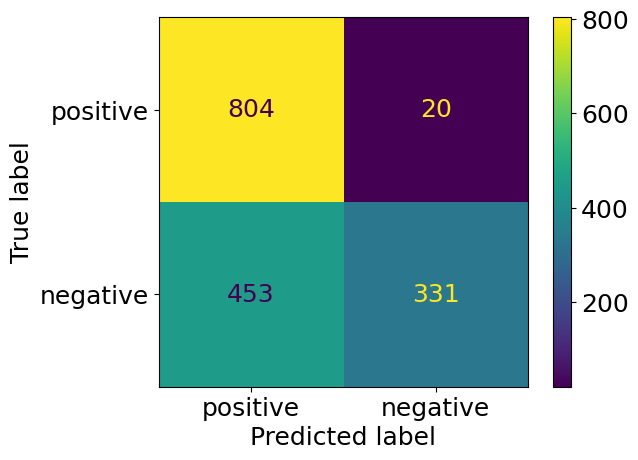

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# 文字サイズの変更
plt.rcParams["font.size"] = 18

# 混同行列の作成
confusion_matrix = confusion_matrix(
    y_true=[result["true_label"] for result in results],
    y_pred=[result["pred_label"] for result in results],
    labels=class_label.names
)

# 混同行列を表示
ConfusionMatrixDisplay(
    confusion_matrix, display_labels=class_label.names
).plot()

`negative`のラベルを`positive`として表現してしまうことが多い

## 誤った予測をしやすいデータの傾向を調べる

In [9]:
# 予測が誤った事例を収集
failed_results = [
    res for res in results if res["pred_label"] != res["true_label"]
]

# モデルの予測確率が高い順にソートする
sorted_failed_results = sorted(
    failed_results, key=lambda x: -x["pred_prob"]
)

# 高い確率で予測したが誤った事例の上位2件を表示する
for top_result in sorted_failed_results[:2]:
  review_text = valid_dataset[top_result["example_id"]]["sentence"]
  print(f"文: {review_text}")

  # 文を出力
  print(f"予測: {top_result['pred_label']}")
  print(f"正解: {top_result['true_label']}")
  print(f"確率: {top_result['pred_prob']:.4f}")
  print("-" * 10)

文: 近い将来、確実に起きる出来事、そこで話す言葉を想像したら、号泣してしまった。
ガードを解いた心はこんなにも繊細で、情け深い。
何十年も付き合っているのに、改めて知る、自分のこころ。
予測: positive
正解: negative
確率: 0.9995
----------
文: つぶやき。
闇が一番深いのは夜明け前。

辛いときもあるさ。
がんばれ、自分。
予測: positive
正解: negative
確率: 0.9993
----------


In [10]:
# テキストのフレーズを変更して予測させる
text = """
  まず、紙ジャケット仕様とありますが、正確には紙ケースです。そのケースはちょうどCD2枚組用のハードケースがぴったり入りそうな紙ケースなのですが、
  その中にケースより一回り小さな写真集と歌詞カードが入っています。中がスカスカなんですが、私だけでしょうか？これで3780円ですか？？？ほかのシリーズができがいいだけに、
  なんか残念で☆4つにさせていただきました
"""

In [11]:
print(pipe(text)[0])

{'label': 'positive', 'score': 0.9995933175086975}


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [12]:
# ☆4つに予測が引きずられている可能性があるので引いてみる
print(pipe(text.replace("☆4つ", ""))[0])

{'label': 'negative', 'score': 0.9290796518325806}


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


### ショートカット
タスクの本質ではなく、データの表層的な特徴に基づいた予測。<br>
機械学習モデルによくみられる現象。

### 解決策
入力の日本質的な特徴と出力ラベルの相関をなくす